<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/forecast_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pmdarima
!pip install catboost
!pip install skforecast
!pip install xgboost
!pip install lightgbm
!pip install nolds

In [12]:
import numpy as np
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:

def metrics_stats(time_series, name):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(22,6))

    plt.plot(time_series)
    plt.title(f'Временной ряд, {name}')

    plt.show()
    import numpy as np
    import nolds
    print('coef_hurst')
    H = nolds.hurst_rs(time_series,debug_plot=True)
    print(f"Hurst exponent: {H}")
    if H >0.5:
        print('Положительные дальнодействующия корреляция hurst')
    elif H<0.5:
        print('Отрицательная дальнодействующия корреляция hurs')
    else:
        print('в данных отсутствуют дальнодействующие корреляции hurst ШУМ')
    print()
    print()

    from scipy.stats import entropy

    # Вычисляем энтропию вашего временного ряда
    unique_values, counts = np.unique(time_series.values, return_counts=True)
    probs = counts / len(time_series)
    entropy_value = entropy(probs, base=2)

    # Ожидаемая энтропия для нормального распределения
    std_dev = np.std(time_series)
    expected_entropy = 0.5 * np.log2(2 * np.pi * np.e * std_dev**2)

    print("Энтропия вашего временного ряда:", entropy_value)
    print("Ожидаемая энтропия для нормального распределения с std dev", std_dev, ":", expected_entropy)
    print()
    print()


    from statsmodels.stats.diagnostic import acorr_ljungbox
    box_pierce = acorr_ljungbox(time_series,boxpierce=True,auto_lag=True)
    box_pierce['result'] = box_pierce.apply(lambda row: 'белый шум' if row['lb_pvalue'] >= 0.05 and row['bp_pvalue'] >= 0.05 else 'не белый шум', axis=1)
    print(box_pierce)
    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.graphics.tsaplots import plot_pacf
    import matplotlib.pyplot as plt

    # Вычисление частичной автокорреляции
    pacf = sm.tsa.stattools.pacf(time_series, nlags=52)

    # Визуализация частичной автокорреляции
    plot_pacf(time_series, lags=52)
    plt.show()

    print(f"Partial Autocorrelation Function (PACF): \n {pacf}")
    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt

    # Вычисление полной автокорреляции
    acf = sm.tsa.stattools.acf(time_series, nlags=52)

    # Визуализация полной автокорреляции
    plot_acf(time_series, lags=52)
    plt.show()

    print(f"Autocorrelation Function (ACF): \n {acf}")

    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.tsa.stattools import kpss


    print('Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)')
    #KPSS
    kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')
    # check p-value against significance level
    if p_value < 0.05:
        print('I По p-value, ряд НЕ стационарен метод KPSS')
    else:
        print('I По p-value, ряд стационарен метод KPSS')

    # check KPSS statistic against critical value

    if abs(kpss_stat) > abs(max(crit.values())):
        print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
    else:
        print('II По значению KPSS статистики, ряд стационарен метод KPSS')
    print()
    print('kpss_stat', kpss_stat)
    print('p_value', p_value)
    print('lags', lags)
    print('crit', crit)

    print()
    print()

    import numpy as np
    import statsmodels.api as sm
    from statsmodels.tsa.stattools import adfuller

    print('Тест на стационарность Дики-Фуллера (Dickey-Fuller test')
    adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(time_series)
    print()
    print('kpss_stat', adf)
    print('pvalue', pvalue)
    print('usedlag', usedlag)
    print('nobs', nobs)
    print('critical_values', critical_values)

    print('Results of Dickey-Fuller Test:')

    if pvalue <= 0.05:
        print('I По p-value, ряд стационарен метод Dickey-Fuller Test')
    else:
        print('I По p-value, ряд НЕ стационарен метод Dickey-Fuller Test')

    # check ADF statistic against critical value
    if abs(adf) > abs(max(critical_values.values())):
        print('II По значению ADF статистики, ряд стационарен, метод Dickey-Fuller Test' )
    else:
        print('II По значению ADF Test статистики, ряд НЕ стационарен, метод Dickey-Fuller Test')
    # print('resstore', resstore)

    print()
    print()

    from pmdarima.arima.utils import ndiffs
    import pandas as pd


    n_diffs = ndiffs(time_series, test='kpss')

    print("ndiffs нужно ли делать дифференцацию:", n_diffs)
    print()
    print()

    from pmdarima.arima.utils import nsdiffs
    import pandas as pd

    # Определение количества сезонных разностей
    n_seasonal_diffs = nsdiffs(time_series,m=52)

    print("nsdiffs Сколько diff надо применить к данным:", n_seasonal_diffs)
    print()
    print()


    # print('Применяем diff для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
    # plt.figure(figsize=(22,12))
    # diff_data = time_series.diff(1)
    # plt.plot(diff_data)
    # plt.title('Диффиринцирование временного ряда diff')
    # plt.show()
    # 22/0


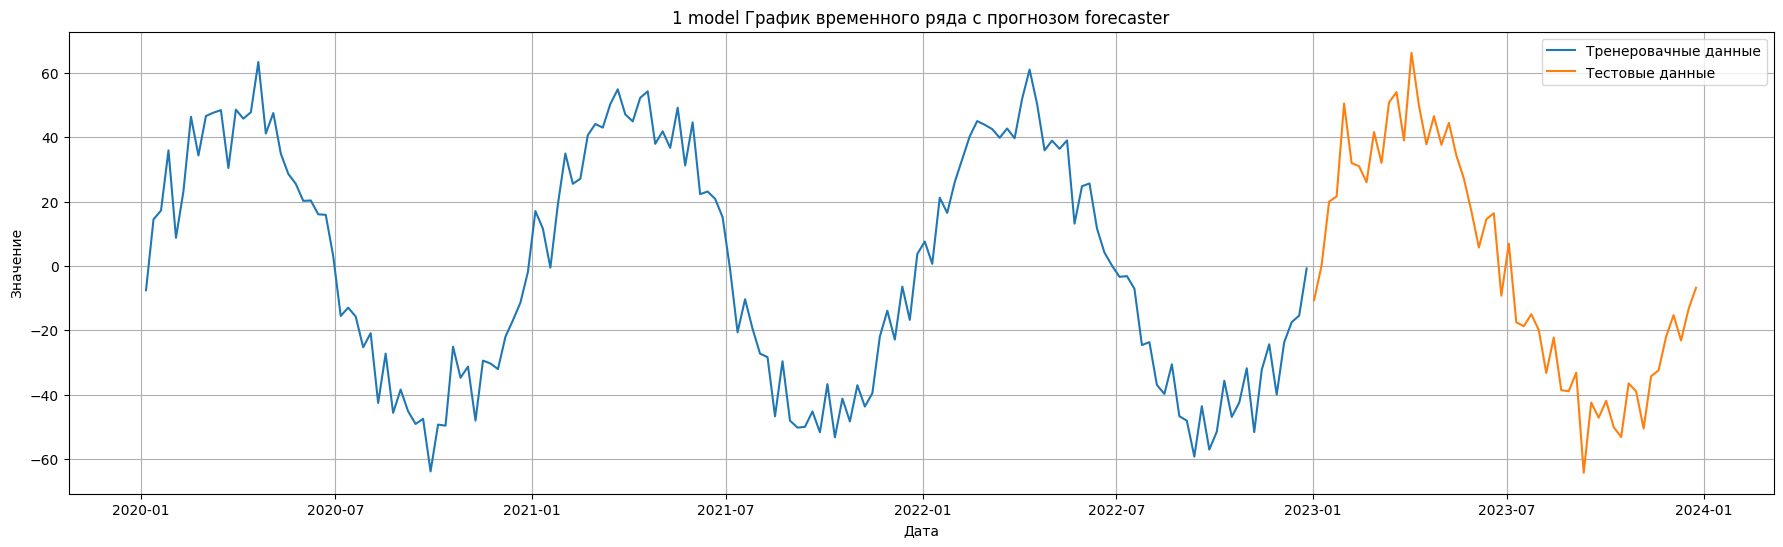

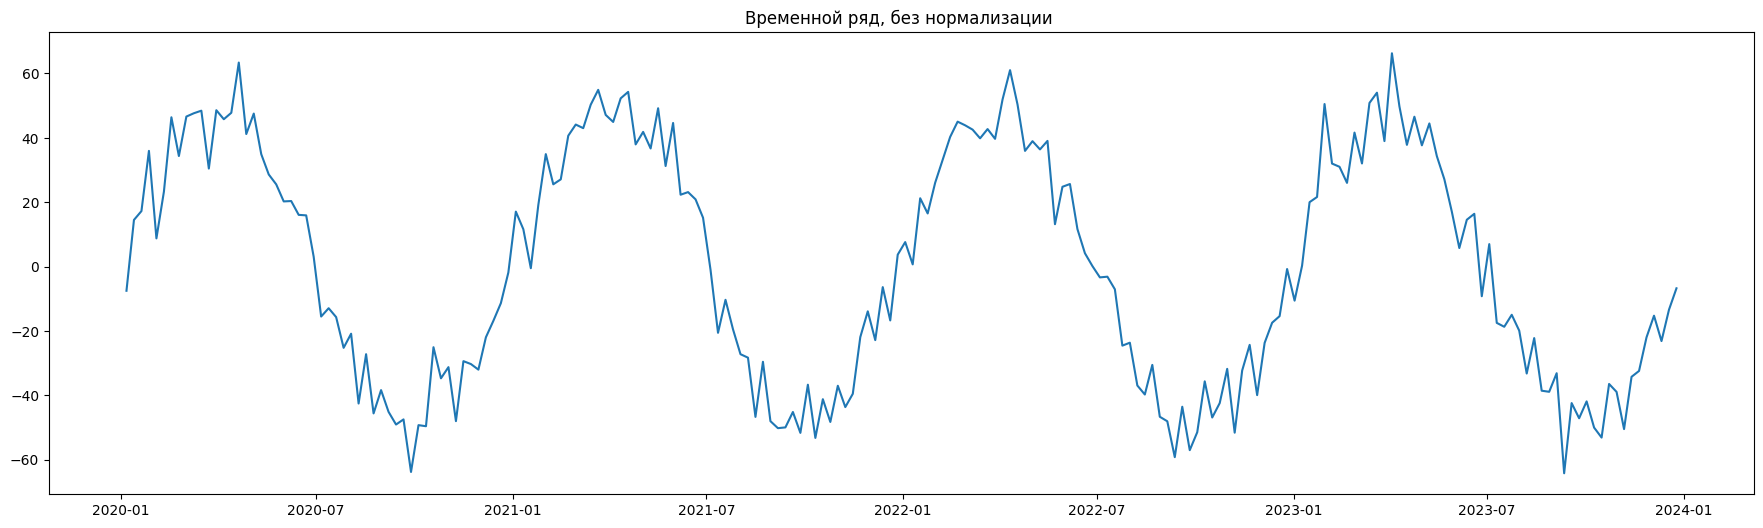

coef_hurst


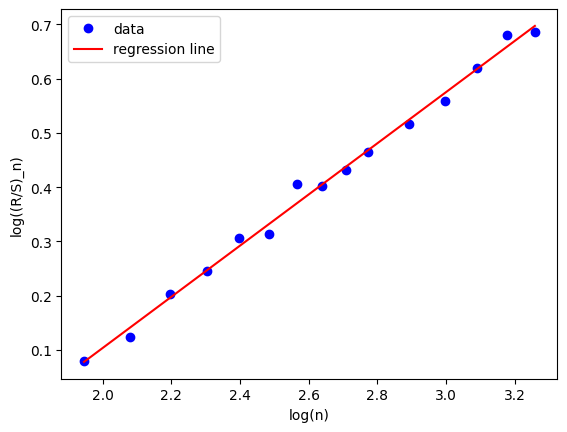

Hurst exponent: 0.9718623270541349
Положительные дальнодействующия корреляция hurst


Энтропия вашего временного ряда: 7.700439718141095
Ожидаемая энтропия для нормального распределения с std dev 35.49340948038282 : 7.196574845737134


         lb_stat      lb_pvalue      bp_stat      bp_pvalue        result
1     186.947898   1.474235e-42   184.277214   5.644040e-42  не белый шум
2     368.568626   9.254221e-81   362.438499   1.983718e-79  не белый шум
3     537.791303  3.077193e-116   527.632065  4.898683e-114  не белый шум
4     688.983954  8.462004e-148   674.504926  1.154402e-144  не белый шум
5     823.162472  1.127637e-175   804.210826  1.420138e-171  не белый шум
..           ...            ...          ...            ...           ...
161  9516.772588   0.000000e+00  6498.655422   0.000000e+00  не белый шум
162  9547.601009   0.000000e+00  6505.408314   0.000000e+00  не белый шум
163  9574.685415   0.000000e+00  6511.212115   0.000000e+00  не белый шум
164  9596.460218   0.000

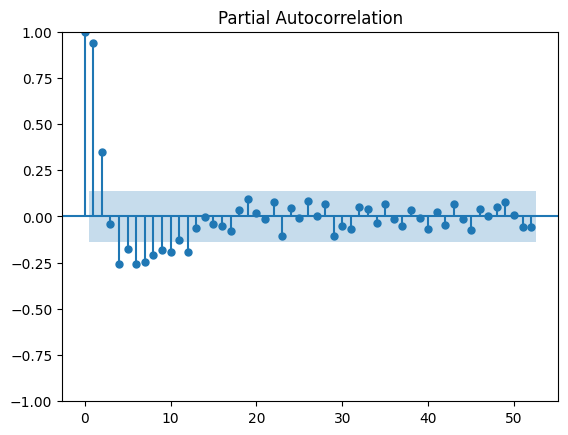

Partial Autocorrelation Function (PACF): 
 [ 1.          0.94579528  0.37881086 -0.03411653 -0.29481268 -0.22322823
 -0.31636661 -0.32670519 -0.31257078 -0.31225382 -0.3762878  -0.39961761
 -0.68877228 -1.54198768  2.48465509  0.75718415  0.56007869  0.58646989
  1.27112852 -4.47419996 -0.84884347 -0.53534981 -0.31863569 -0.45997556
 -0.27596776 -0.27639791 -0.03664009  0.05536544  0.35883291  0.35136654
  0.5870014   1.14875188 -8.11180559 -0.90260793 -0.63596266 -0.57499811
 -1.14406038  7.32337373  0.90588189  0.508207    0.31256525  0.37386077
  0.25896844  0.42208601  0.38411697  0.30888385  0.50228615  0.73895821
  2.74774238 -1.57982648 -0.68496164 -0.62818795 -0.93931778]




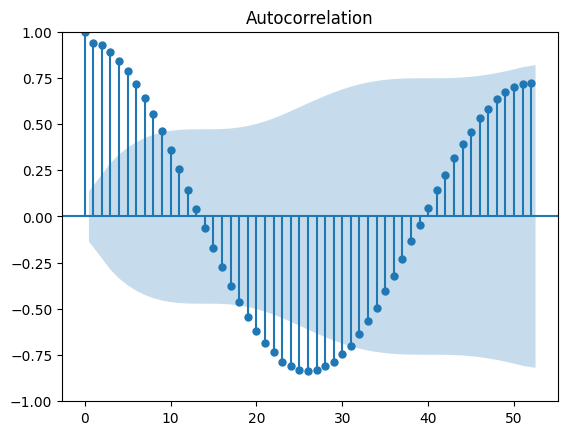

Autocorrelation Function (ACF): 
 [ 1.          0.94124818  0.92549697  0.8911789   0.84030919  0.78967465
  0.7181464   0.6402308   0.55470391  0.4604129   0.35946741  0.25706889
  0.14399385  0.04079557 -0.06463635 -0.17221565 -0.27416717 -0.37615042
 -0.46255772 -0.54206904 -0.61892011 -0.68382712 -0.73352935 -0.78653494
 -0.80920224 -0.83250455 -0.83485421 -0.82939809 -0.80886202 -0.7852447
 -0.74593902 -0.69898682 -0.63532122 -0.56414066 -0.49371676 -0.40333629
 -0.32210894 -0.2323943  -0.13495675 -0.04541751  0.04736762  0.14261368
  0.22684106  0.31708021  0.39248578  0.45734024  0.53203286  0.58237129
  0.63555762  0.6745281   0.69934803  0.71424439  0.7202826 ]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.049730802627017394
p_value 0.1
lags 9
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера 

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


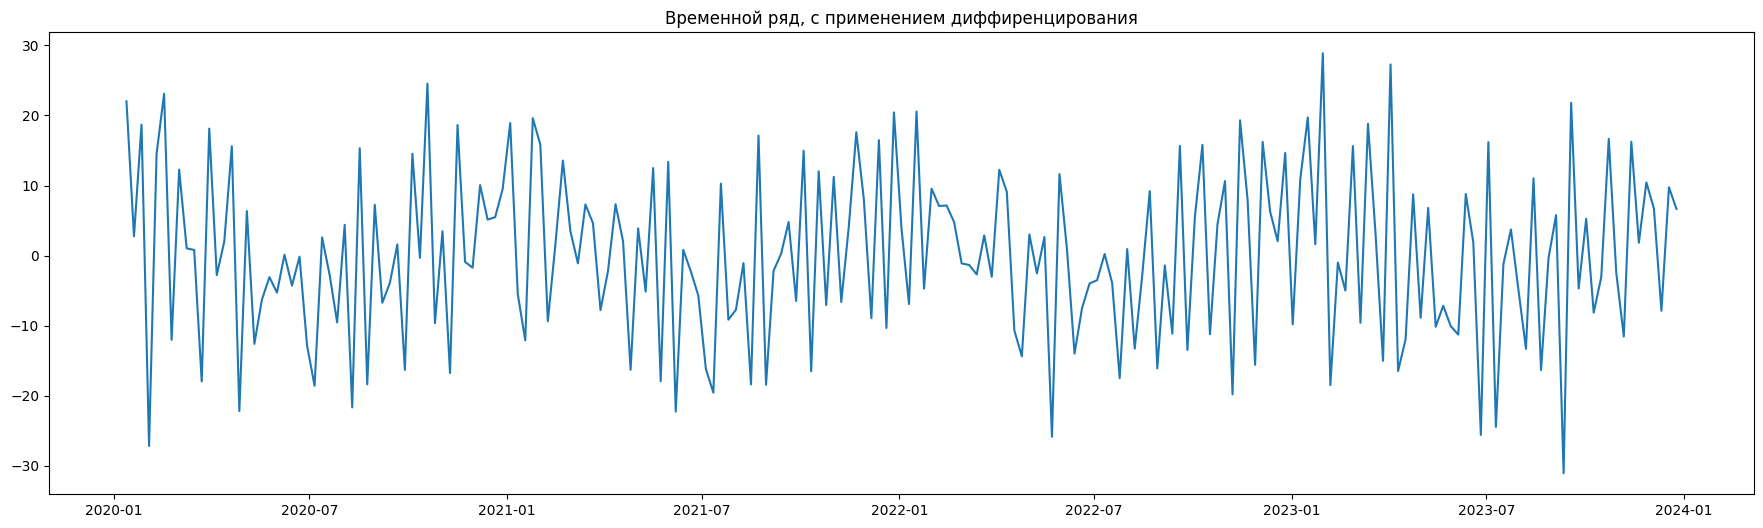

coef_hurst


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


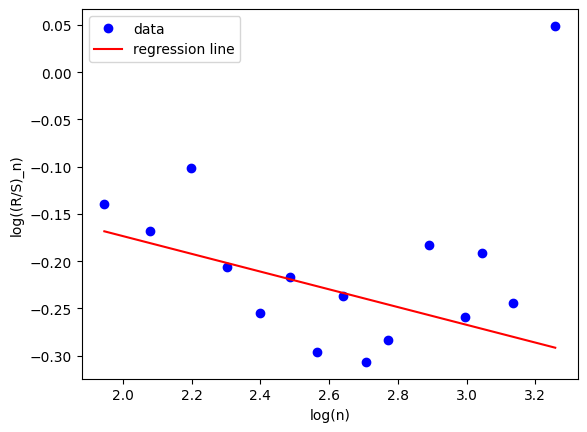

Hurst exponent: 0.4061103784995716
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.693486957499326
Ожидаемая энтропия для нормального распределения с std dev 12.176167257764497 : 5.653083761720035


       lb_stat     lb_pvalue     bp_stat     bp_pvalue        result
1    27.710599  1.408887e-07   27.312839  1.730585e-07  не белый шум
2    32.917561  7.112832e-08   32.420146  9.121258e-08  не белый шум
3    37.537307  3.541508e-08   36.929372  4.762453e-08  не белый шум
4    37.558960  1.381626e-07   36.950403  1.844182e-07  не белый шум
5    44.471618  1.857842e-08   43.631538  2.751420e-08  не белый шум
6    45.240400  4.192633e-08   44.370892  6.240096e-08  не белый шум
7    45.981405  8.815108e-08   45.079988  1.319569e-07  не белый шум
8    47.384723  1.294983e-07   46.416161  1.980920e-07  не белый шум
9    48.110057  2.435906e-07   47.103320  3.754515e-07  не белый шум
10   48.127764  5.882035e-07   47.120010  8.979740e-07  не белый шум
11   

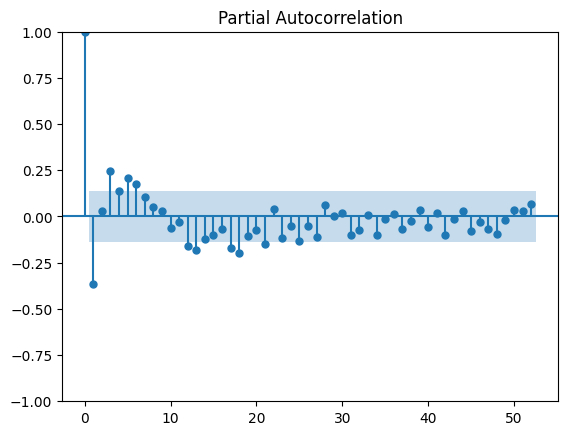

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00 -3.65007152e-01  2.92795003e-02  2.50164334e-01
  1.43492995e-01  2.12997752e-01  1.84813338e-01  1.10055020e-01
  5.34326810e-02  3.30347948e-02 -6.37116126e-02 -3.07185993e-02
 -1.73985331e-01 -2.02138311e-01 -1.42843653e-01 -1.21167652e-01
 -8.73322139e-02 -2.01506955e-01 -2.42716138e-01 -1.51821176e-01
 -1.18744196e-01 -2.15056590e-01 -8.19456636e-03 -1.81112695e-01
 -1.21326733e-01 -2.31916161e-01 -1.68730635e-01 -2.71452307e-01
 -9.26072082e-02 -1.51752809e-01 -1.30086063e-01 -3.13440334e-01
 -4.05210051e-01 -5.13595357e-01 -1.31622386e+00  3.83417856e+00
  8.02330853e-01  3.91213909e-01  3.21407187e-01  3.16208348e-01
  1.61172884e-01  2.33797091e-01  6.29046759e-02  1.57930255e-01
  2.07422819e-01  6.20836205e-02  1.16242731e-01  5.60047787e-02
  2.77439681e-03  1.01415181e-01  1.84431391e-01  1.90754020e-01
  3.01732718e-01]




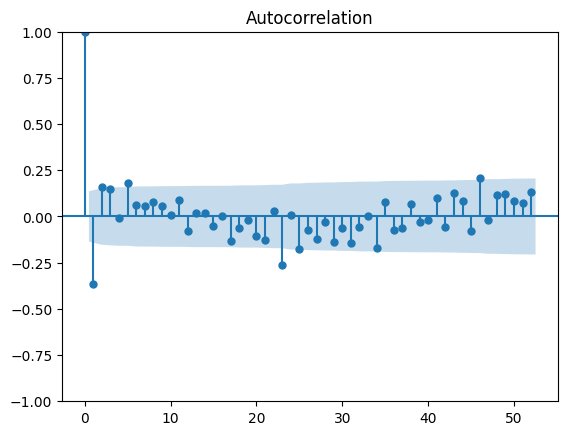

Autocorrelation Function (ACF): 
 [ 1.         -0.36324383  0.15707635  0.14759302 -0.01007978  0.17965525
  0.05976421  0.05852849  0.08034266  0.05761604  0.00897935  0.0874744
 -0.078137    0.01725896  0.01985933 -0.04899735  0.00165997 -0.13269384
 -0.06186345 -0.02067276 -0.10512643 -0.12819947  0.02931217 -0.26088565
  0.00565224 -0.17668554 -0.07469805 -0.1225474  -0.02738573 -0.13819115
 -0.06176466 -0.14578515 -0.05888408  0.00419564 -0.17012602  0.07843792
 -0.07534193 -0.06295676  0.06704908 -0.03013843 -0.01782738  0.09934185
 -0.05778643  0.12958071  0.08259364 -0.07838821  0.20793342 -0.02071546
  0.11751907  0.1217108   0.08175936  0.07558002  0.13403695]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.04719598594371435
p_value 0.1
lags 6
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера (

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


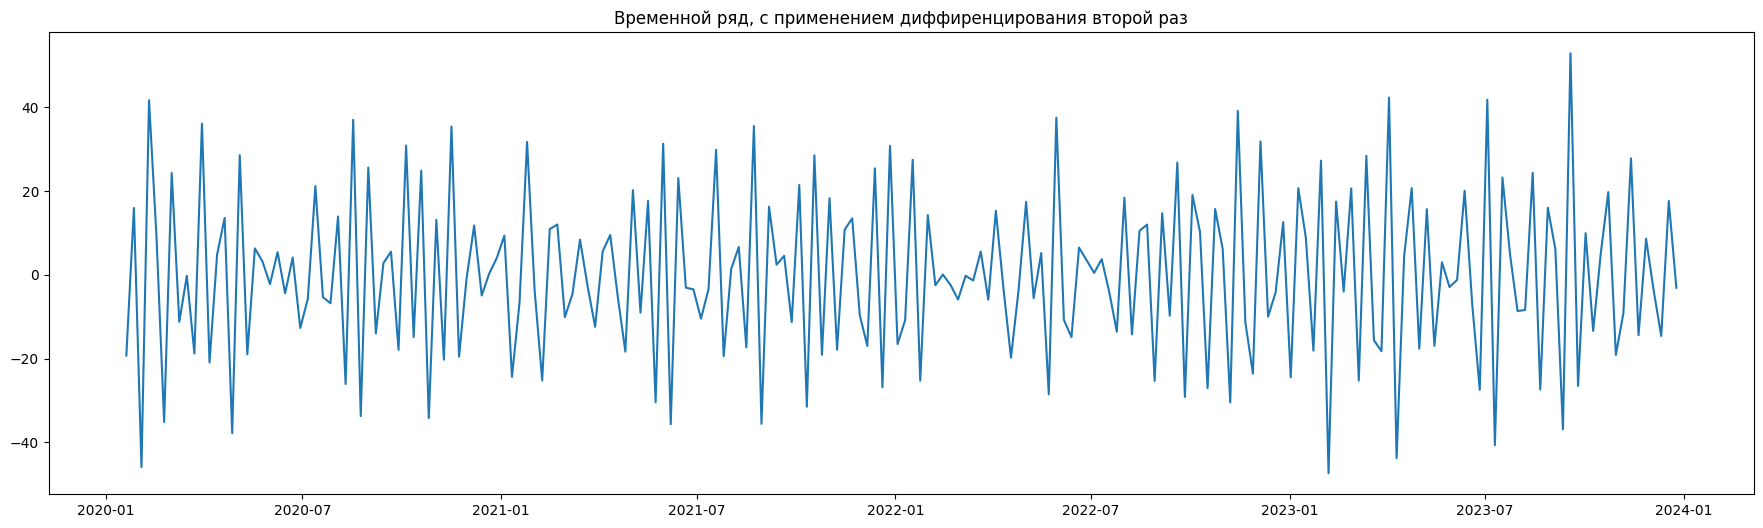

coef_hurst


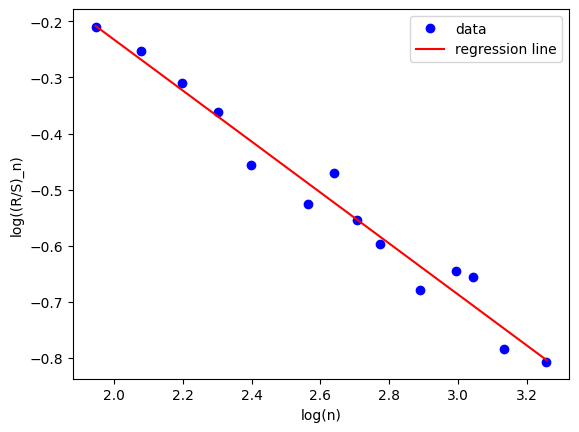

Hurst exponent: 0.0465297347867481
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.6865005271832185
Ожидаемая энтропия для нормального распределения с std dev 20.090195485307532 : 6.37551528218359


      lb_stat     lb_pvalue     bp_stat     bp_pvalue        result
1   99.621980  1.844460e-23   98.185124  3.810417e-23  не белый шум
2  107.422792  4.714515e-24  105.835921  1.042369e-23  не белый шум
3  108.334244  2.504930e-23  106.725463  5.558375e-23  не белый шум
4  112.466781  2.166698e-23  110.738792  5.063144e-23  не белый шум




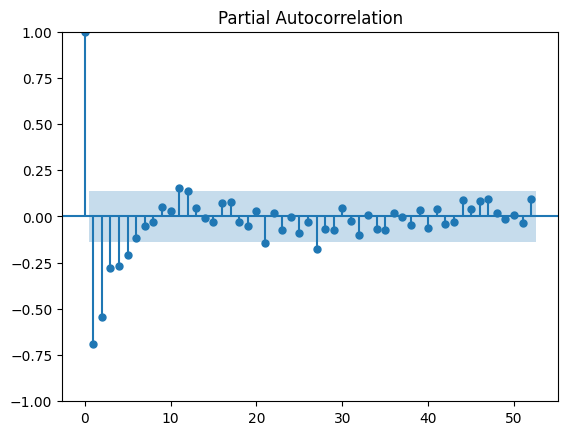

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00 -6.93749362e-01 -5.52680534e-01 -2.97316431e-01
 -2.92119316e-01 -2.41676868e-01 -1.57468136e-01 -8.94070768e-02
 -5.88450463e-02  3.89679635e-02  3.03245236e-02  1.79485554e-01
  1.92352236e-01  1.08111596e-01  3.74959446e-02 -8.99811427e-03
  9.61759639e-02  1.08176423e-01 -1.87625664e-02 -6.58955863e-02
  1.57837767e-02 -1.97537907e-01 -3.63324614e-02 -1.41570672e-01
 -6.47130953e-02 -1.68481408e-01 -1.04391415e-01 -2.98132721e-01
 -2.24472386e-01 -2.65634686e-01 -1.17475930e-01 -1.68653205e-01
 -2.80512321e-01 -1.70995069e-01 -2.71231780e-01 -3.55361943e-01
 -3.12008537e-01 -3.61539194e-01 -5.44972467e-01 -7.14193957e-01
 -2.32857995e+00  1.42334143e+00  9.68947596e-01  1.83318198e+01
 -1.07950768e+00 -2.47021529e-01  2.17818371e-01  3.26440079e-01
  2.50935610e-01  2.58680381e-01  2.91690956e-01  2.17755966e-01
  3.72360139e-01]




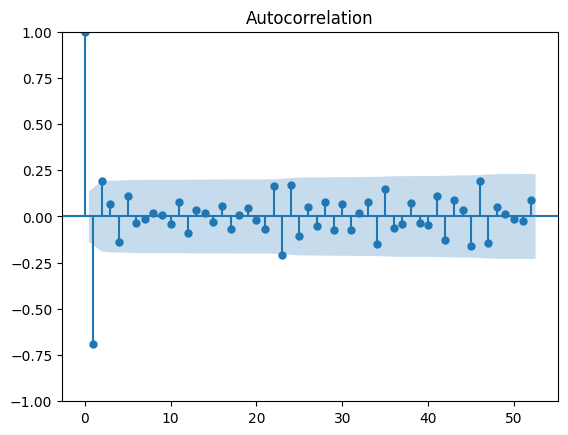

Autocorrelation Function (ACF): 
 [ 1.         -0.69038165  0.19271687  0.06571272 -0.13957858  0.11268358
 -0.03561968 -0.01274122  0.01868392  0.00811026 -0.04036087  0.08092028
 -0.09186431  0.03377125  0.0206558  -0.02987843  0.05777472 -0.07021242
  0.0105391   0.04334527 -0.02013116 -0.06876459  0.16573358 -0.20619899
  0.17089098 -0.10664616  0.0530143  -0.05356596  0.07728218 -0.07120859
  0.0660385  -0.07314519  0.01796765  0.07947937 -0.15113808  0.14636619
 -0.06115758 -0.03831103  0.07219306 -0.0331081  -0.04677266  0.1090772
 -0.12837584  0.08987298  0.03432367 -0.16025306  0.19168364 -0.14231709
  0.05295415  0.01476248 -0.01283356 -0.02471619  0.09101961]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.03305236351885746
p_value 0.1
lags 9
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера (

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


ZeroDivisionError: division by zero

In [45]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random

random.seed(4)
np.random.seed(4)

# Определение количества периодов
n_periods = 1460  # Примерное количество периодов в вашем временном ряду
train_size = 1096
valid_size = 183
seasonality_amplitude = 100  # Амплитуда сезонности
end_train = '2023-01-01 23:59:59'


# Генерация значений временного ряда
trend_slope = 0.5
noise_level = 3.0


# Создаем временной ряд
time = np.arange(1, 1461)

# Определение количества периодов
# Создаем временной ряд
time = np.arange(1, 1461)
kf = 0.5
# Создаем сезонность
seasonality = kf* np.sin(time * 2 * np.pi / 365)

# Создаем тренд
trend = np.where(time <= 700, time / 700, (1460 - time) / 760)
noise = np.random.normal(loc=0, scale=0.08, size=len(time))
# Комбинируем тренд и сезонность
values_seasonal = seasonality+noise #+trend

# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})

# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']

data = data.sort_index()
data=data * 100




# # Генерация случайной даты в указанном интервале
# random_date = random.choice(pd.date_range(start='2020-01-01', end='2023-01-01',freq='MS'))

# # Умножение значения в случайно выбранной точке на 1.5
# data.loc[random_date] *= 1.5



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('1 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print('======================================')
print('======================================')
print('======================================')
metrics_stats(data, 'без нормализации ')
print('Применяем diff для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff===================')
print('===================diff===================')
print('===================diff===================')
metrics_stats(data.diff(1).dropna(), 'с применением диффиренцирования')
data_2 = data.diff(1).dropna()
print('Применяем diff_2 для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff_2===================')
print('===================diff_2===================')
print('===================diff_2===================')
metrics_stats(data_2.diff(1).dropna(), 'с применением диффиренцирования второй раз')
22/0
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'1_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'1_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'1_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 1_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'1_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'1_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'1_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'4_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('1_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('1_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('1_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('1_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('1_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('1_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('1_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('1_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")





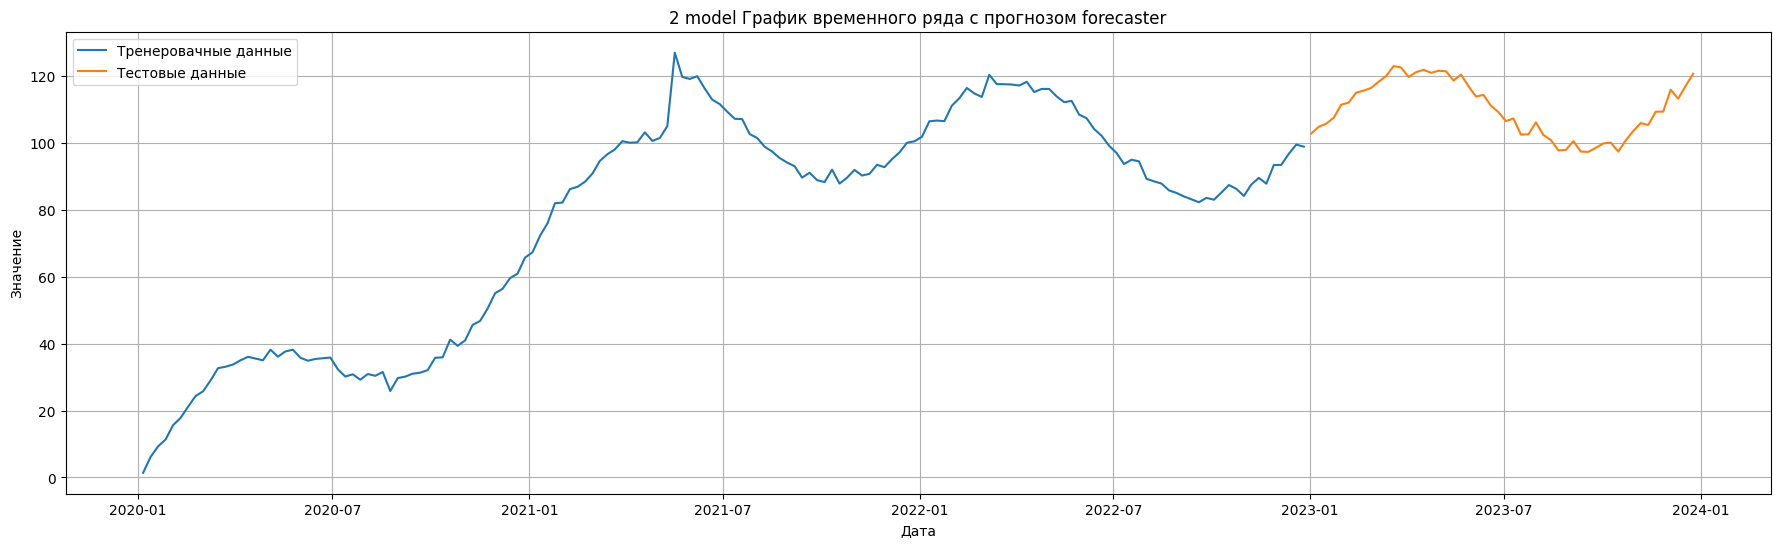

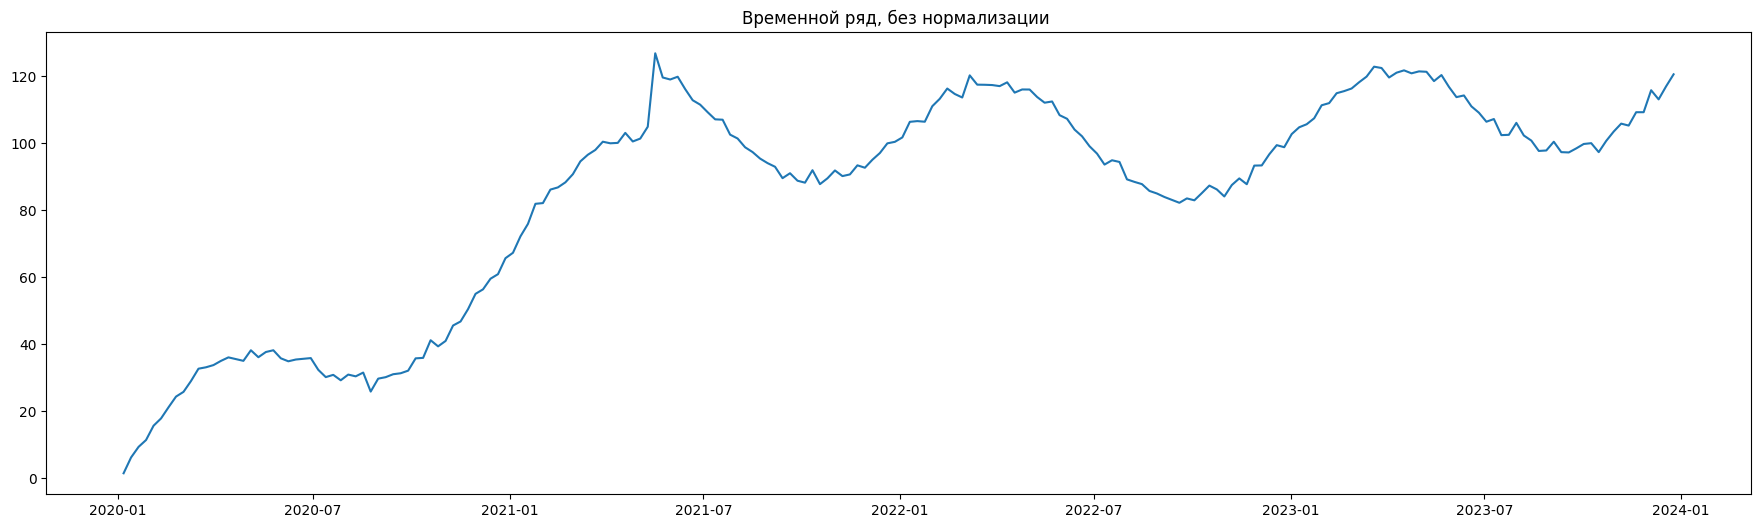

coef_hurst


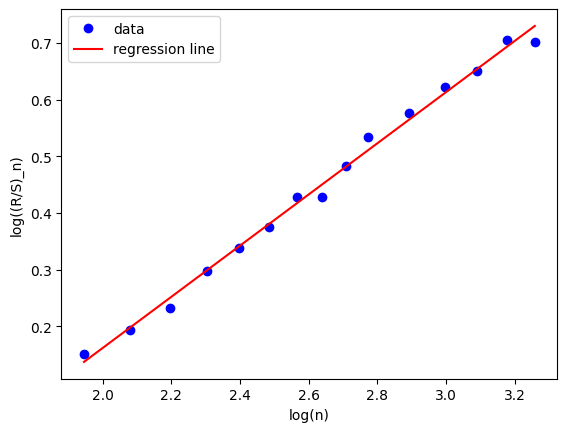

Hurst exponent: 0.9521483943091273
Положительные дальнодействующия корреляция hurst


Энтропия вашего временного ряда: 7.700439718141095
Ожидаемая энтропия для нормального распределения с std dev 32.20743608883614 : 7.0564174979092895


         lb_stat      lb_pvalue      bp_stat      bp_pvalue        result
1     201.205896   1.139416e-45   198.331526   4.829894e-45  не белый шум
2     394.457798   2.210942e-86   387.902440   5.862130e-85  не белый шум
3     579.805326  2.405479e-125   568.836931  5.738856e-123  не белый шум
4     756.431790  2.098024e-162   740.416925  6.167732e-159  не белый шум
5     924.740712  1.175879e-197   903.115550  5.634116e-193  не белый шум
..           ...            ...          ...            ...           ...
183  6368.379229   0.000000e+00  3795.866459   0.000000e+00  не белый шум
184  6394.082303   0.000000e+00  3798.803953   0.000000e+00  не белый шум
185  6418.951516   0.000000e+00  3801.527724   0.000000e+00  не белый шум
186  6442.953899   0.00

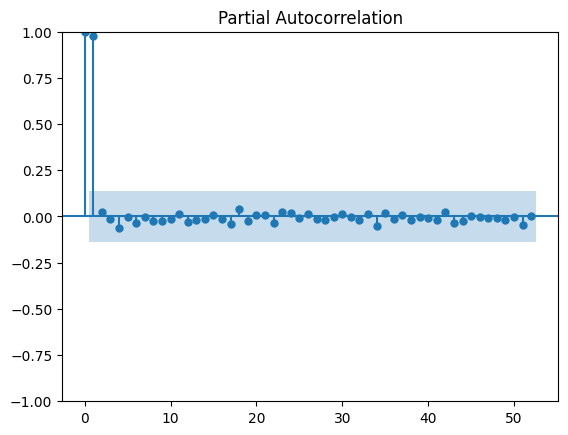

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00  9.81199231e-01  3.19137564e-02 -1.68223677e-02
 -8.10172125e-02 -4.82329329e-03 -4.22847003e-02 -5.73564509e-03
 -3.42868930e-02 -3.22016279e-02 -1.85079332e-02  1.84107897e-02
 -3.99101269e-02 -2.60211657e-02 -1.55365738e-02  9.66315265e-03
 -1.58350036e-02 -5.71521136e-02  5.87395636e-02 -3.16992066e-02
  1.45362698e-02  7.96112514e-03 -4.44494323e-02  3.01368744e-02
  2.59665860e-02 -6.42449416e-03  1.77575912e-02 -2.20992225e-02
 -2.72217185e-02 -1.87872487e-03  1.94579375e-02 -6.92663907e-04
 -2.47028527e-02  2.21782873e-02 -8.04347515e-02  3.23062249e-02
 -1.81547996e-02  1.49868448e-02 -3.34225236e-02 -4.18044080e-03
 -1.12191319e-02 -3.04830922e-02  3.43447805e-02 -5.70097431e-02
 -4.24369900e-02  5.86832887e-03 -6.56672796e-03 -1.50227739e-02
 -1.67832265e-02 -2.74326542e-02 -2.59662539e-03 -8.05772426e-02
  4.02403735e-03]




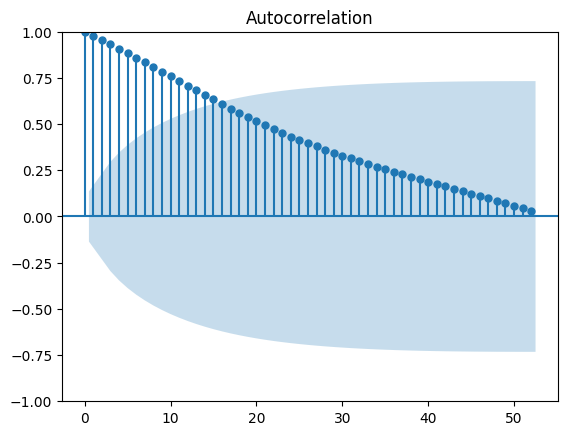

Autocorrelation Function (ACF): 
 [1.         0.97648193 0.954672   0.93267216 0.90824216 0.8844235
 0.85957767 0.83505452 0.8099252  0.78419591 0.75856668 0.73409714
 0.70871317 0.68314977 0.65786871 0.63342408 0.60905148 0.58337348
 0.56064231 0.53724367 0.5148934  0.49369911 0.47147938 0.45131029
 0.43238983 0.4136967  0.39653191 0.37929516 0.36172612 0.34501876
 0.32939778 0.31435042 0.29919175 0.28527409 0.26959084 0.25542992
 0.24145231 0.22817686 0.21455264 0.20145006 0.18846397 0.17498303
 0.1632831  0.14994913 0.13626077 0.12339924 0.11051455 0.09775018
 0.08499667 0.07201371 0.05930844 0.04534071 0.03168153]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд НЕ стационарен метод KPSS
II По значению KPSS статистики, ряд НЕ стационарен метод KPSS

kpss_stat 0.35481376129502223
p_value 0.01
lags 9
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера (Dickey-Fuller test

kpss_stat -1.7801019884205

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


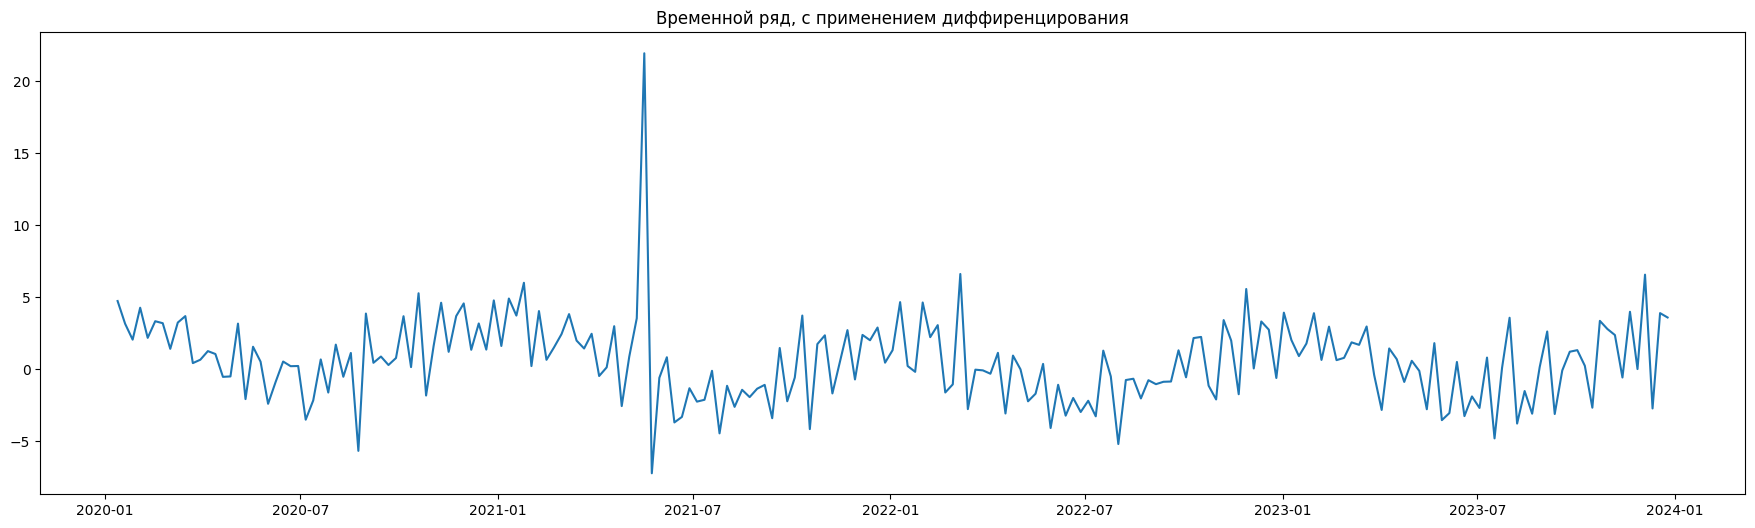

coef_hurst


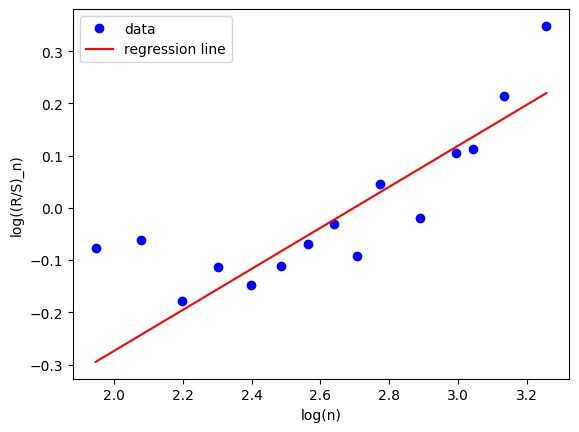

Hurst exponent: 0.892272864321884
Положительные дальнодействующия корреляция hurst


Энтропия вашего временного ряда: 7.693486957499326
Ожидаемая энтропия для нормального распределения с std dev 2.9397375587576415 : 3.6027829512698673


       lb_stat     lb_pvalue     bp_stat     bp_pvalue        result
1     0.549616  4.584747e-01    0.541727  4.617180e-01     белый шум
2    10.216628  6.046269e-03   10.023724  6.658494e-03  не белый шум
3    29.459251  1.793129e-06   28.805998  2.459793e-06  не белый шум
4    40.280050  3.787945e-08   39.316152  5.993714e-08  не белый шум
5    48.486335  2.825908e-09   47.247585  5.057997e-09  не белый шум
..         ...           ...         ...           ...           ...
79  400.373943  1.756515e-44  317.569613  2.391039e-30  не белый шум
80  407.345795  2.379534e-45  321.806097  9.695061e-31  не белый шум
81  412.188511  7.630338e-46  324.725629  6.480997e-31  не белый шум
82  415.651997  4.274633e-46  326.797092  5.970599e-31  не белый шум
83  

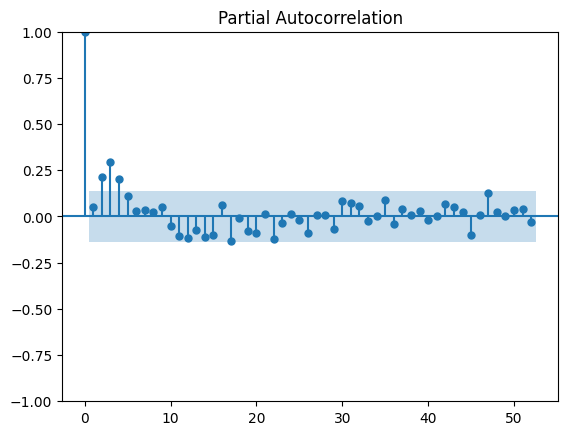

Partial Autocorrelation Function (PACF): 
 [ 1.          0.05140532  0.21403625  0.30044031  0.20559734  0.11420105
  0.0315379   0.03741185  0.02768118  0.05581086 -0.05424861 -0.10976584
 -0.1283563  -0.08055434 -0.12232656 -0.11646736  0.0617548  -0.14784455
 -0.01052845 -0.09120275 -0.10526354  0.01276567 -0.14021586 -0.04366584
  0.00878629 -0.02780313 -0.10529133  0.00594367  0.0076086  -0.08576341
  0.1006319   0.08824493  0.0774583  -0.01888666  0.01005032  0.1208586
 -0.03914041  0.06106658  0.02143366  0.04542465 -0.01632042  0.01073527
  0.09914375  0.07746606  0.04152635 -0.12479689  0.01889185  0.17780118
  0.03689743  0.01339272  0.0569849   0.07462287 -0.03628994]




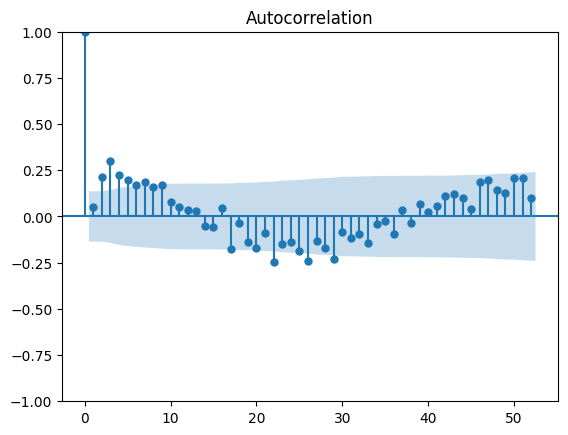

Autocorrelation Function (ACF): 
 [ 1.          0.05115698  0.21402512  0.30122354  0.22533018  0.195745
  0.16789399  0.18400499  0.15889471  0.17018164  0.07667462  0.05358592
  0.03365177  0.02803194 -0.04988505 -0.05824696  0.04820324 -0.17765448
 -0.03747769 -0.1382711  -0.16930096 -0.09038943 -0.24453292 -0.14968895
 -0.14017735 -0.18554158 -0.23885814 -0.13029005 -0.16863441 -0.23010584
 -0.08252833 -0.11602435 -0.09512264 -0.14531416 -0.04055187 -0.02562896
 -0.09695061  0.03356471 -0.03336228  0.06749953  0.0230454   0.05824434
  0.11129028  0.12290618  0.10165417  0.04133902  0.18853591  0.19888755
  0.14226421  0.12672852  0.21056173  0.20554835  0.10104476]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.08012814057302502
p_value 0.1
lags 7
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера (D

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


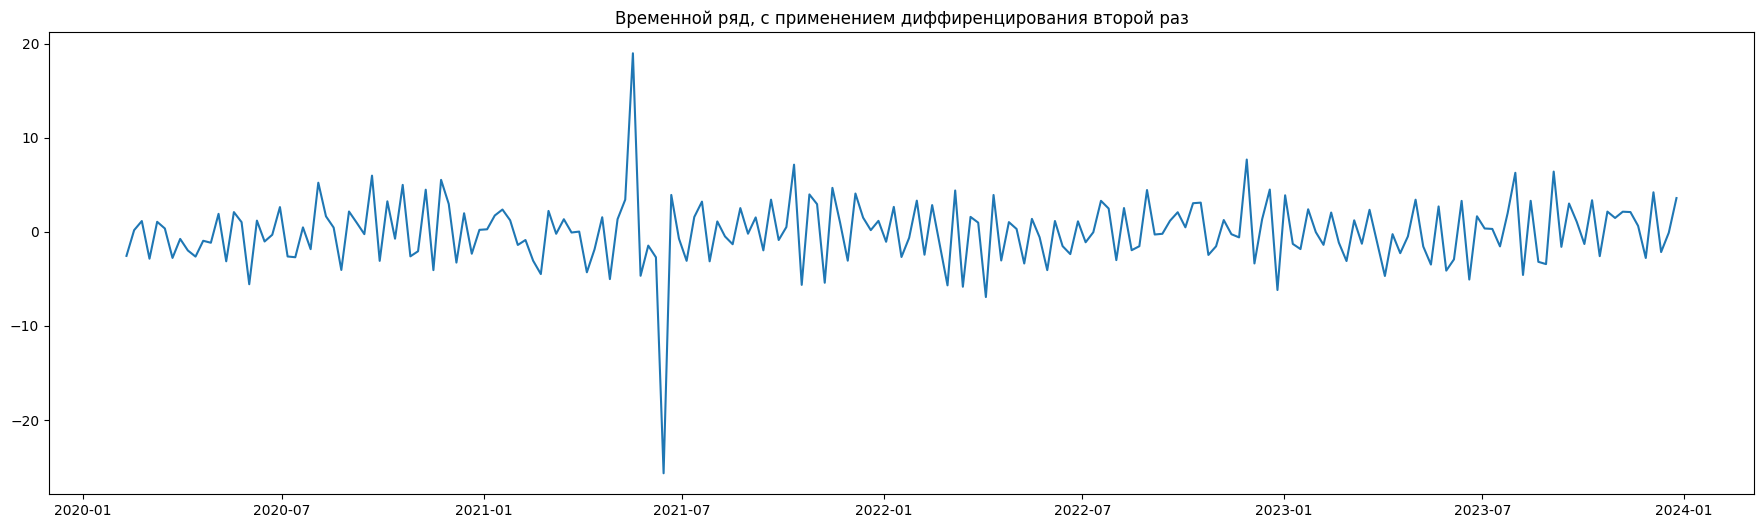

coef_hurst


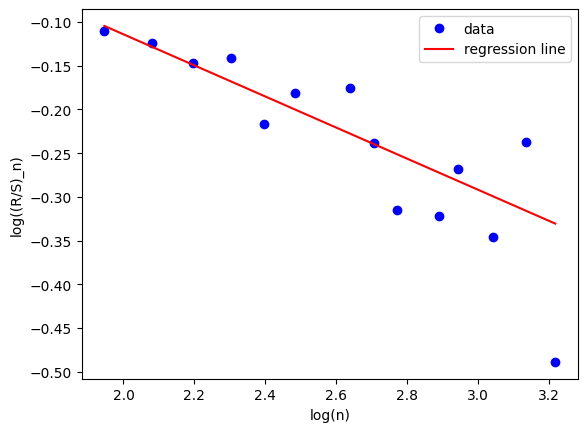

Hurst exponent: 0.32233192633113483
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.665335917185179
Ожидаемая энтропия для нормального распределения с std dev 3.6231640103306053 : 3.904345699151541


     lb_stat  lb_pvalue    bp_stat  bp_pvalue        result
1  13.191429   0.000281  12.998383   0.000312  не белый шум
2  13.257484   0.001322  13.063150   0.001457  не белый шум
3  24.702462   0.000018  24.228982   0.000022  не белый шум




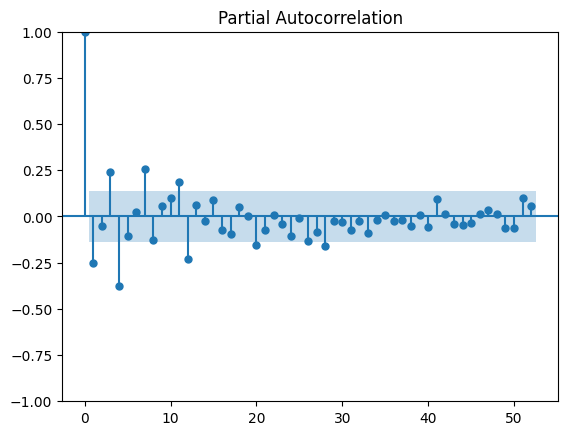

Partial Autocorrelation Function (PACF): 
 [ 1.         -0.25429705 -0.04985105  0.24671435 -0.38605999 -0.1053001
  0.02884306  0.26793082 -0.13699238  0.06153566  0.10798116  0.20184741
 -0.25586096  0.06990394 -0.02371189  0.10661888 -0.09462932 -0.10395068
  0.06363441  0.00891229 -0.18669711 -0.0821142   0.02133137 -0.03946566
 -0.14206768 -0.00583644 -0.15025292 -0.09504418 -0.21308171 -0.02138133
 -0.04022475 -0.10154572 -0.05341184 -0.11552879 -0.03040987 -0.0092932
 -0.05205379 -0.03286223 -0.0781907  -0.00470645 -0.099984    0.12422232
  0.00769798 -0.06163926 -0.08292861 -0.04024267  0.01448139  0.03804549
  0.00868923 -0.09025283 -0.09515183  0.14888233  0.08068193]




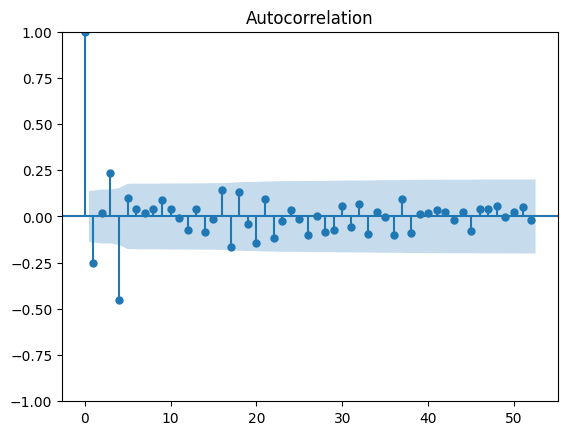

Autocorrelation Function (ACF): 
 [ 1.00000000e+00 -2.53044354e-01  1.78619246e-02  2.34529520e-01
 -4.52256790e-01  9.86807479e-02  3.78148043e-02  2.11445624e-02
  3.98657140e-02  8.75265188e-02  4.15492918e-02 -1.08270066e-02
 -7.09845196e-02  3.77999207e-02 -8.21238661e-02 -1.49802952e-02
  1.45767897e-01 -1.65348828e-01  1.30235408e-01 -3.82462033e-02
 -1.42698703e-01  9.58758883e-02 -1.18465080e-01 -2.28514705e-02
  3.45908800e-02 -1.27801535e-02 -1.02878691e-01  1.17323967e-03
 -8.48455225e-02 -7.50967505e-02  5.78792209e-02 -5.77138891e-02
  6.58498438e-02 -9.52565408e-02  2.25543252e-02 -1.71689596e-03
 -1.00121732e-01  9.66272877e-02 -9.02849048e-02  1.23264381e-02
  1.77251473e-02  3.77497885e-02  2.61716180e-02 -1.81702116e-02
  2.19686897e-02 -7.97483370e-02  4.12851162e-02  4.01075129e-02
  5.64898206e-02 -1.57882760e-04  2.60058082e-02  5.07351488e-02
 -1.74895800e-02]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен ме

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


ZeroDivisionError: division by zero

In [49]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random

random.seed(2)
np.random.seed(2)



# Определение количества периодов
n_periods = 1460  # Примерное количество периодов в вашем временном ряду
train_size = 1096
valid_size = 183
seasonality_amplitude = 100  # Амплитуда сезонности
end_train = '2023-01-01 23:59:59'
trend_amplitude = 300


# Генерация значений временного ряда
trend_slope = 0.5
noise_level = 10.0



periods = np.arange(1, n_periods + 1)
trend = trend_slope * periods
noise = np.random.normal(0, noise_level, n_periods)
values = trend + noise
seasonality = seasonality_amplitude * np.sin(2 * np.pi * periods / 365)


# Создаем тренд
seasonality_trend = np.ones_like(periods, dtype=float)
seasonality_trend[:500] = (periods[:500] / 500) * trend_amplitude
seasonality_trend[500:] = ((1460 - periods[500:])**2 / (800**2)) * trend_amplitude

values_seasonal = seasonality + values + seasonality_trend

# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})

# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']

data = data.sort_index()
data = data/6



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('2 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print('======================================')
print('======================================')
print('======================================')
metrics_stats(data, 'без нормализации ')
print('Применяем diff для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff===================')
print('===================diff===================')
print('===================diff===================')
metrics_stats(data.diff(1).dropna(), 'с применением диффиренцирования')
data_2 = data.diff(1).dropna()
print('Применяем diff_2 для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff_2===================')
print('===================diff_2===================')
print('===================diff_2===================')
metrics_stats(data_2.diff(1).dropna(), 'с применением диффиренцирования второй раз')
22/0
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'2_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'2_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'2_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 2_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'2_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'2_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'2_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'2_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('2_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('2_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('2_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('2_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('2_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('2_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('2_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('2_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")







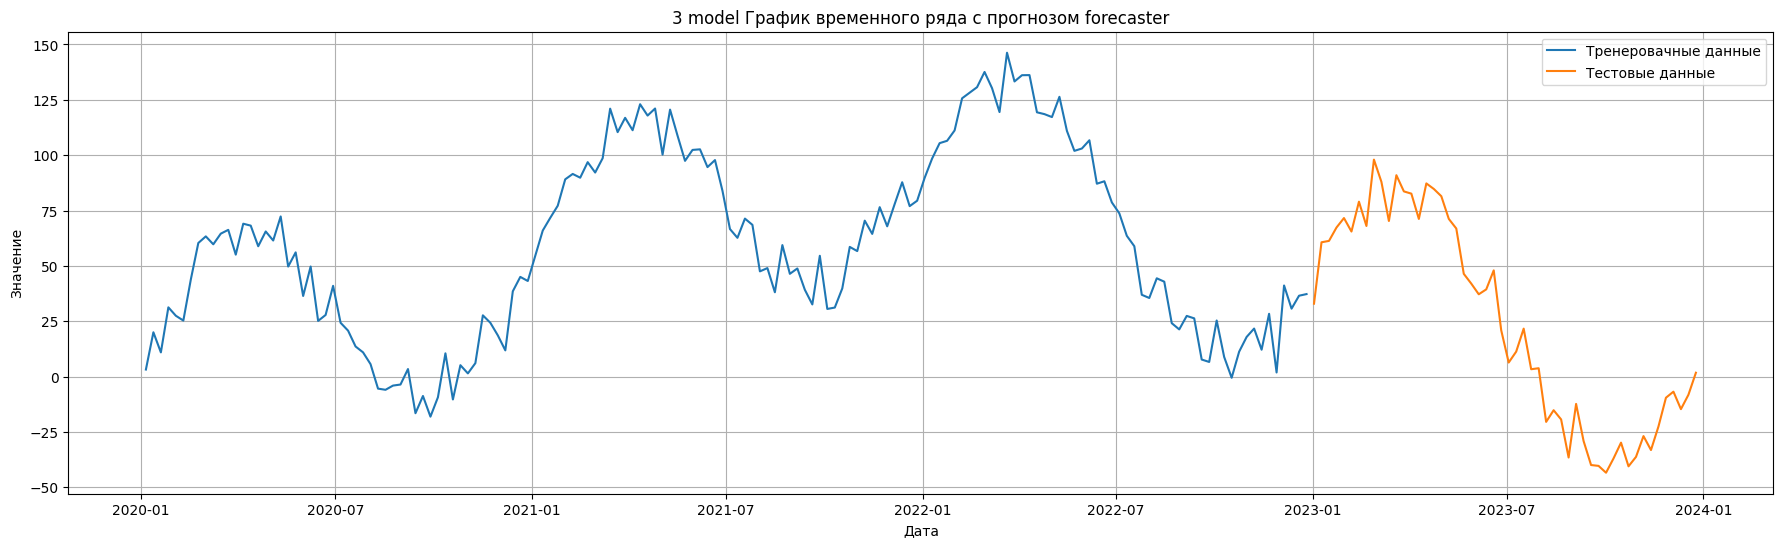

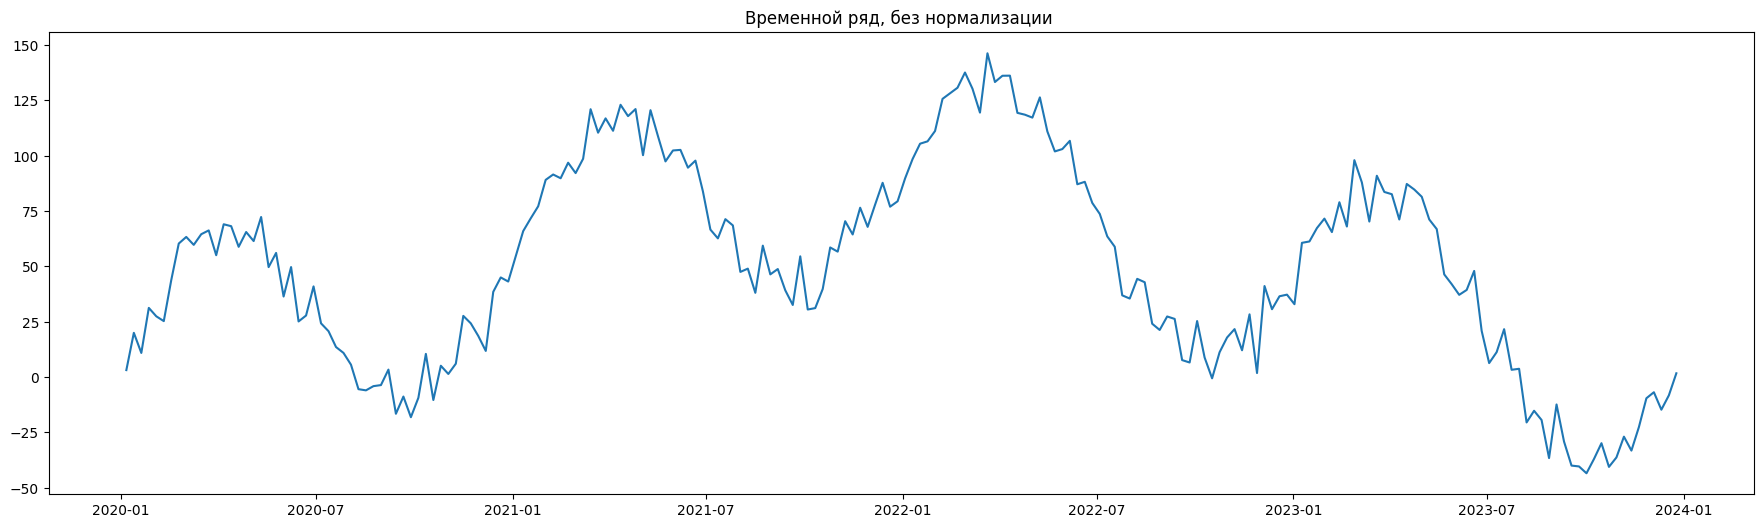

coef_hurst


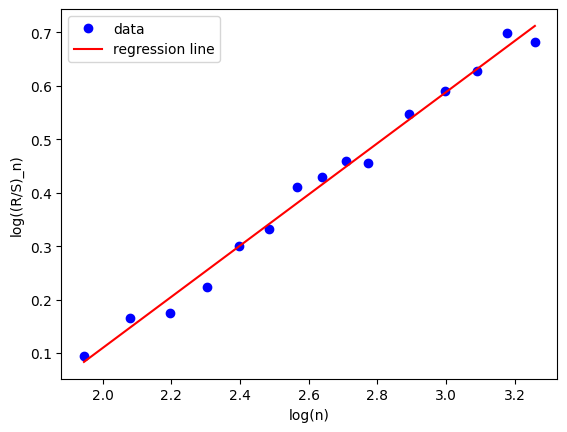

Hurst exponent: 0.9792513167303131
Положительные дальнодействующия корреляция hurst


Энтропия вашего временного ряда: 7.700439718141095
Ожидаемая энтропия для нормального распределения с std dev 45.156778769516016 : 7.543966256103733


         lb_stat      lb_pvalue      bp_stat      bp_pvalue        result
1     193.923250   4.426038e-44   191.152917   1.781058e-43  не белый шум
2     381.041213   1.811140e-83   374.706729   4.299992e-82  не белый шум
3     558.206425  1.156454e-120   547.653722  2.241244e-118  не белый шум
4     724.570648  1.666214e-155   709.264682  3.436628e-152  не белый шум
5     877.244702  2.237266e-187   856.849600  5.796538e-183  не белый шум
..           ...            ...          ...            ...           ...
163  5225.289178   0.000000e+00  3549.464275   0.000000e+00  не белый шум
164  5249.160497   0.000000e+00  3554.465885   0.000000e+00  не белый шум
165  5269.975707   0.000000e+00  3558.728047   0.000000e+00  не белый шум
166  5288.933538   0.00

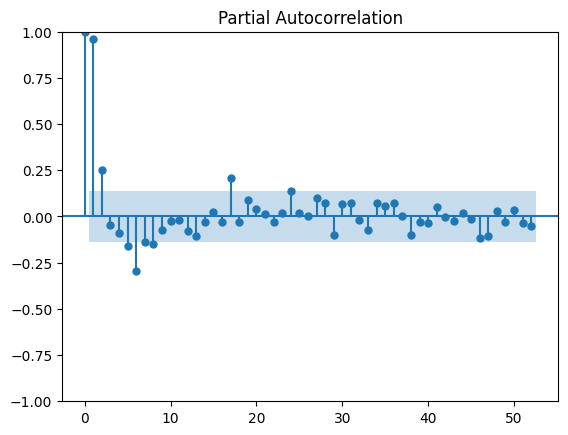

Partial Autocorrelation Function (PACF): 
 [ 1.          0.96327832  0.28593053 -0.04033497 -0.10579011 -0.19228979
 -0.36617961 -0.20857729 -0.21706869 -0.1203426  -0.0272803   0.01350329
 -0.0545793  -0.11723871 -0.04873837  0.03068387 -0.01407968  0.32367283
  0.08164046  0.2080722   0.14221788  0.07044154 -0.05271522 -0.01614403
  0.1713597   0.07813336  0.03823575  0.16028135  0.12798045 -0.18779095
 -0.01623692  0.04958249 -0.04684723 -0.14105592  0.07365217  0.0758292
  0.1086292   0.03361461 -0.20569857 -0.22276254 -0.23526185 -0.03871805
  0.02056793  0.07429992  0.1627744   0.02864773 -0.37351691 -0.72705408
 -1.35710001  2.72416226  1.06785565 -4.55039832 -0.87509274]




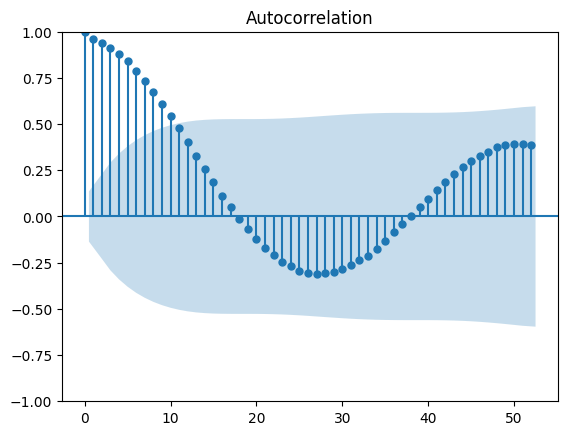

Autocorrelation Function (ACF): 
 [ 1.00000000e+00  9.58647177e-01  9.39398875e-01  9.11853020e-01
  8.81462289e-01  8.42343682e-01  7.87556690e-01  7.34860355e-01
  6.73180697e-01  6.11280659e-01  5.46062626e-01  4.77830062e-01
  4.05048266e-01  3.28101007e-01  2.55393416e-01  1.84827890e-01
  1.11746844e-01  5.38587890e-02 -1.49018266e-02 -6.86084609e-02
 -1.21860165e-01 -1.68136000e-01 -2.10133016e-01 -2.47622194e-01
 -2.68802990e-01 -2.92428886e-01 -3.07175385e-01 -3.11207455e-01
 -3.06003083e-01 -3.02475664e-01 -2.86721049e-01 -2.63113288e-01
 -2.36749514e-01 -2.12210168e-01 -1.73920601e-01 -1.32741922e-01
 -8.45477909e-02 -4.12056268e-02  9.05344194e-04  4.97777296e-02
  9.35129872e-02  1.45264282e-01  1.87920920e-01  2.27302708e-01
  2.65709823e-01  3.02830571e-01  3.29868268e-01  3.51294971e-01
  3.73717397e-01  3.86160276e-01  3.92415799e-01  3.91369767e-01
  3.85037022e-01]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд НЕ стационарен

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


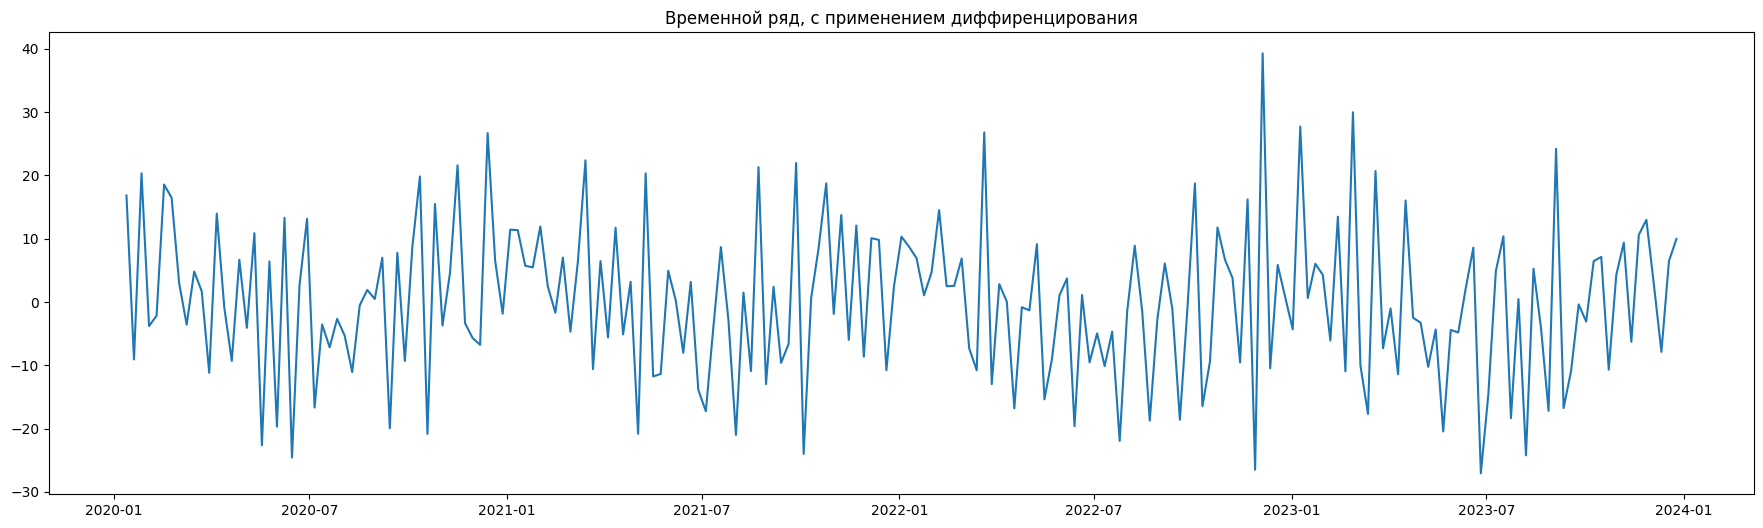

coef_hurst


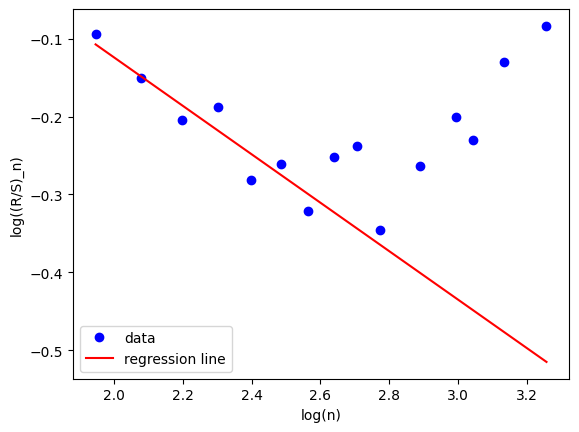

Hurst exponent: 0.18966238605415225
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.693486957499326
Ожидаемая энтропия для нормального распределения с std dev 12.135472801436944 : 5.648253997456981


      lb_stat     lb_pvalue    bp_stat     bp_pvalue        result
1   18.575103  1.633399e-05  18.308475  1.878695e-05  не белый шум
2   20.324804  3.859446e-05  20.024688  4.484295e-05  не белый шум
3   21.809239  7.147262e-05  21.473611  8.393202e-05  не белый шум
4   24.443466  6.508143e-05  24.032215  7.869589e-05  не белый шум
5   32.495413  4.739244e-06  31.814478  6.465554e-06  не белый шум
6   32.559998  1.274077e-05  31.876591  1.723085e-05  не белый шум
7   38.132293  2.859642e-06  37.208931  4.281964e-06  не белый шум
8   38.143880  7.081201e-06  37.219964  1.048472e-05  не белый шум
9   38.393240  1.481537e-05  37.456200  2.181473e-05  не белый шум
10  39.362662  2.193146e-05  38.369961  3.271593e-05  не белый шум
11  40.019639  3.549949e-0

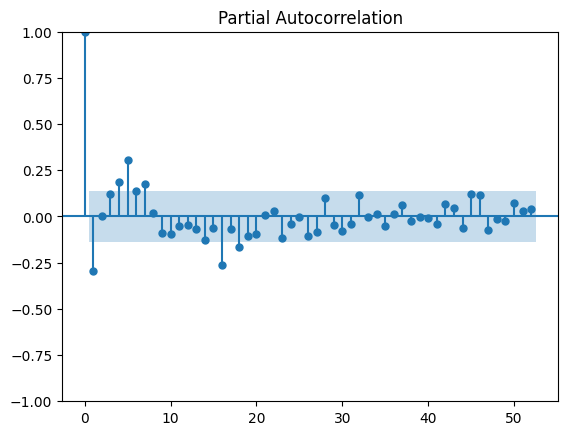

Partial Autocorrelation Function (PACF): 
 [ 1.         -0.29884366  0.00289352  0.12425351  0.19200604  0.31632928
  0.14677153  0.18384884  0.02504587 -0.09373677 -0.10491158 -0.05698756
 -0.05082705 -0.07367227 -0.13767903 -0.07070395 -0.29602769 -0.0914431
 -0.1993377  -0.14019648 -0.13501663 -0.01843556  0.01705541 -0.14642047
 -0.06297758 -0.01977293 -0.14297801 -0.12375397  0.09825815 -0.05978056
 -0.11035244 -0.07057418  0.12863866 -0.00258564  0.02638781 -0.052446
  0.02952448  0.09561892 -0.00634391  0.01805693  0.00768933 -0.03623772
  0.10709443  0.08990611 -0.06287816  0.19756121  0.22014511 -0.04153684
  0.02959062  0.02241723  0.14977711  0.09915651  0.12722679]




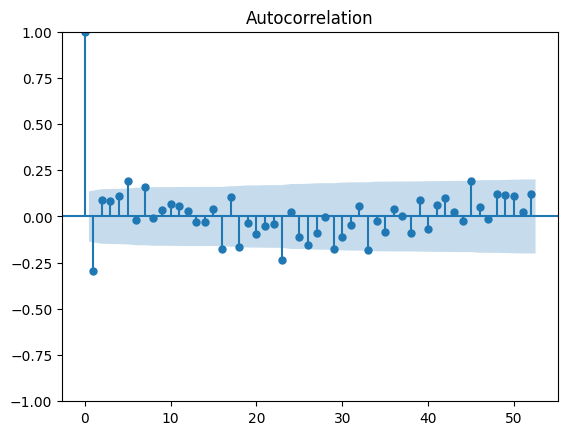

Autocorrelation Function (ACF): 
 [ 1.         -0.29739997  0.0910543   0.08366376  0.11117735  0.19389553
 -0.01732231  0.16049952 -0.00730066  0.03378216  0.06644023  0.05455632
  0.03029037 -0.03244528 -0.03056675  0.03786654 -0.17432461  0.10631518
 -0.16520583 -0.03475166 -0.09555562 -0.05137267 -0.04283083 -0.23568437
  0.02159031 -0.11104147 -0.15168145 -0.09080858 -0.00143848 -0.1777575
 -0.10980627 -0.04840697  0.05722827 -0.18141619 -0.023085   -0.08153491
  0.04063129  0.00360095 -0.09027612  0.08668511 -0.06913117  0.0612811
  0.09778309  0.02385785 -0.02273556  0.19123877  0.05136347 -0.01295651
  0.12155505  0.11778787  0.11065666  0.02646328  0.12369076]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.06513661399180895
p_value 0.1
lags 3
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера (D

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


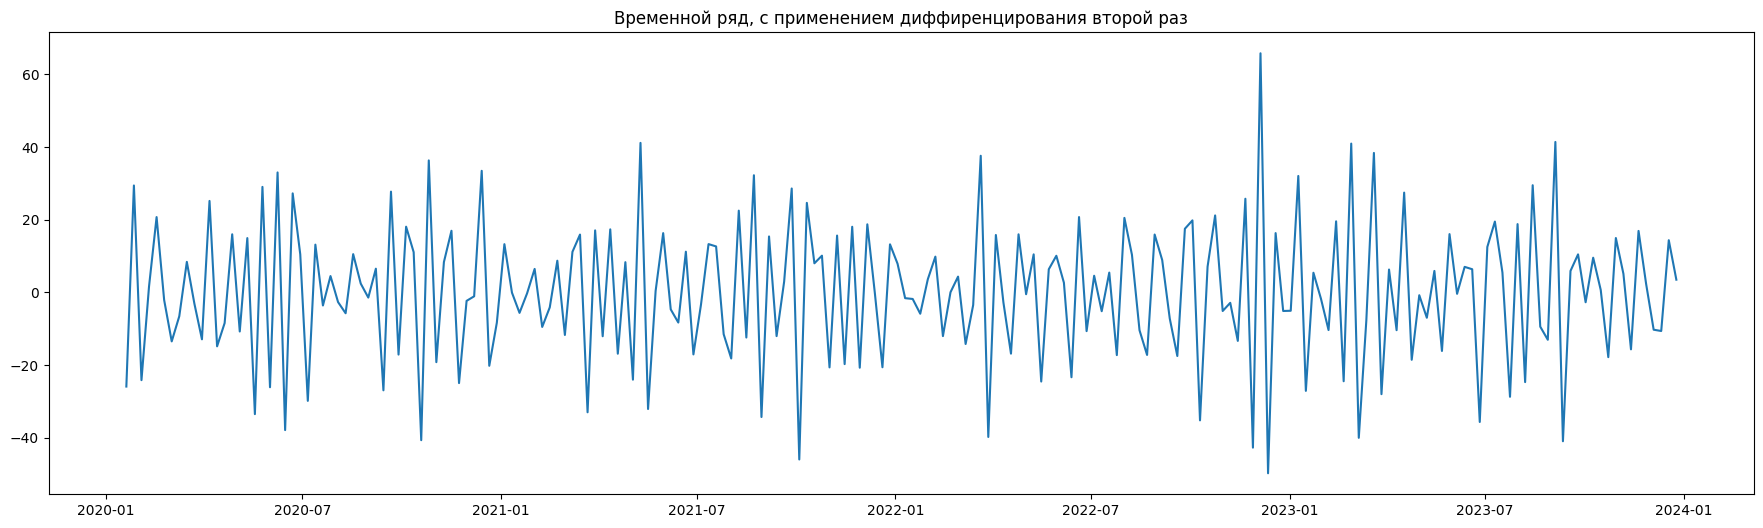

coef_hurst


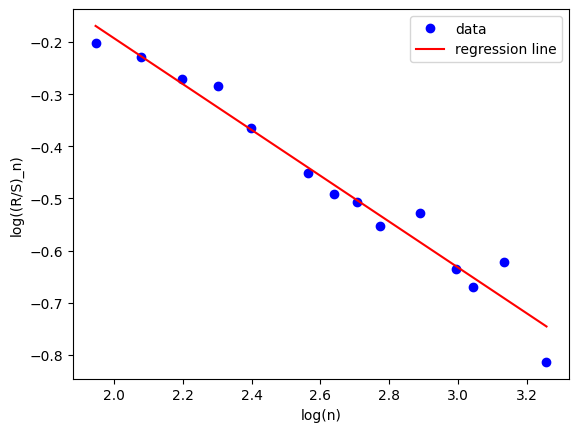

Hurst exponent: 0.06052172824857366
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.6865005271832185
Ожидаемая энтропия для нормального распределения с std dev 19.5481444922127 : 6.336055353640217


       lb_stat     lb_pvalue     bp_stat     bp_pvalue        result
1    87.462058  8.591214e-21   86.200586  1.625794e-20  не белый шум
2    92.113307  9.950606e-21   90.762388  1.955230e-20  не белый шум
3    92.133149  7.626553e-20   90.781753  1.488125e-19  не белый шум
4    92.245592  4.388895e-19   90.890953  8.515767e-19  не белый шум
5    94.810646  6.544889e-19   93.369683  1.315335e-18  не белый шум
6    99.508288  3.177836e-19   97.886646  6.922834e-19  не белый шум
7   103.417694  2.121097e-19  101.626894  4.975485e-19  не белый шум
8   104.762658  4.524364e-19  102.907197  1.085526e-18  не белый шум
9   104.765107  1.704034e-18  102.909517  4.053111e-18  не белый шум
10  104.818697  5.889830e-18  102.960015  1.390755e-17  не белый шум
11  1

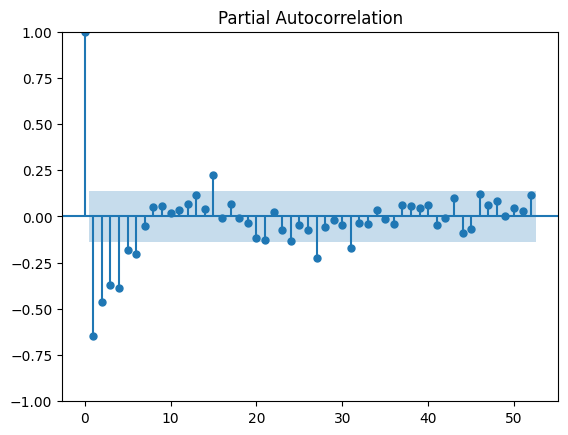

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00 -6.50032183e-01 -4.71500941e-01 -3.84324619e-01
 -4.13855950e-01 -2.21348813e-01 -2.59544161e-01 -1.09095790e-01
  1.28129178e-02  4.48508416e-02  2.29708527e-02  5.05353121e-02
  9.24611981e-02  1.61028755e-01  9.68728458e-02  3.20176353e-01
  9.47543239e-02  1.69921217e-01  7.53366628e-02  8.46574543e-03
 -1.59528719e-01 -2.72587934e-01 -1.75399774e-01 -3.37836231e-01
 -5.64013611e-01 -9.63981681e-01 -2.54283900e+01  1.04529138e+00
  6.52961584e-01  5.86475679e-01  7.59654547e-01  2.08641573e+00
 -1.98768508e+00 -7.00598611e-01 -4.10812119e-01 -3.86837392e-01
 -3.62077640e-01 -2.24739340e-01 -2.33928005e-01 -2.42039169e-01
 -2.15682982e-01 -3.63463573e-01 -3.80606394e-01 -2.80201987e-01
 -6.58873122e-01 -1.67686284e+00  1.97063312e+00  7.20201360e-01
  6.59922724e-01  1.01669238e+00 -5.71660085e+01 -9.84030198e-01
 -4.21341639e-01]




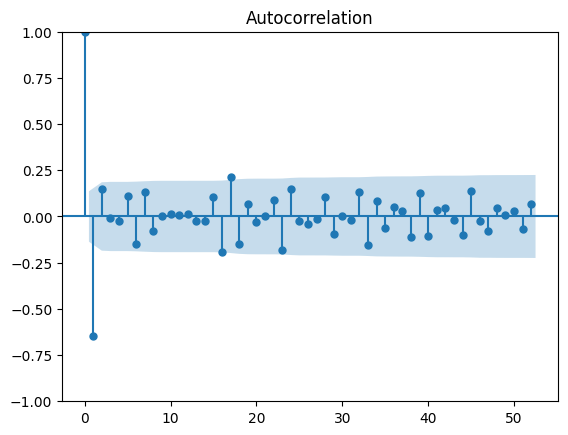

Autocorrelation Function (ACF): 
 [ 1.         -0.64687669  0.14881084 -0.00969554 -0.02302387  0.10969352
 -0.1480777   0.13474623 -0.07883565  0.00335583  0.01565688  0.00764738
  0.01071753 -0.02219054 -0.02264343  0.10599474 -0.19373449  0.21587003
 -0.15015016  0.0666615  -0.03133889  0.00360773  0.08848089 -0.18378455
  0.14944213 -0.02677007 -0.04054765 -0.01477833  0.10274041 -0.09313702
  0.00371758 -0.01735945  0.13076139 -0.15268489  0.08166689 -0.06427351
  0.0533719   0.02915365 -0.11007666  0.12728929 -0.10568012  0.0334496
  0.04589768 -0.01743271 -0.09935862  0.13927796 -0.02628305 -0.07807869
  0.0461613   0.00630452  0.02820509 -0.06904192  0.06636019]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд НЕ стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.2100509071394557
p_value 0.01223090982270411
lags 89
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарн

ZeroDivisionError: division by zero

In [47]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random

random.seed(3)
np.random.seed(3)

# Определение количества периодов
# Создаем временной ряд
time = np.arange(1, 1461)
kf = 0.5
# Создаем сезонность
seasonality = kf* np.sin(time * 2 * np.pi / 365)

# Создаем тренд
trend = np.where(time <= 700, time / 700, (1460 - time) / 760)
noise = np.random.normal(loc=0, scale=0.08, size=len(time))
# Комбинируем тренд и сезонность
values_seasonal = trend + seasonality+noise

# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})

# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']

data = data.sort_index()
data=data * 100


# # Генерация случайной даты в указанном интервале
# random_date = random.choice(pd.date_range(start='2020-01-01', end='2023-01-01',freq='MS'))

# # Умножение значения в случайно выбранной точке на 1.5
# data.loc[random_date] *= 1.5



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('3 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print('======================================')
print('======================================')
print('======================================')
metrics_stats(data, 'без нормализации ')
print('Применяем diff для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff===================')
print('===================diff===================')
print('===================diff===================')
metrics_stats(data.diff(1).dropna(), 'с применением диффиренцирования')
data_2 = data.diff(1).dropna()
print('Применяем diff_2 для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff_2===================')
print('===================diff_2===================')
print('===================diff_2===================')
metrics_stats(data_2.diff(1).dropna(), 'с применением диффиренцирования второй раз')
22/0
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'3_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'3_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'3_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 3_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'3_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'3_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'3_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'3_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('3_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('3_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('3_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('3_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('3_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('3_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('3_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('3_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")







float64


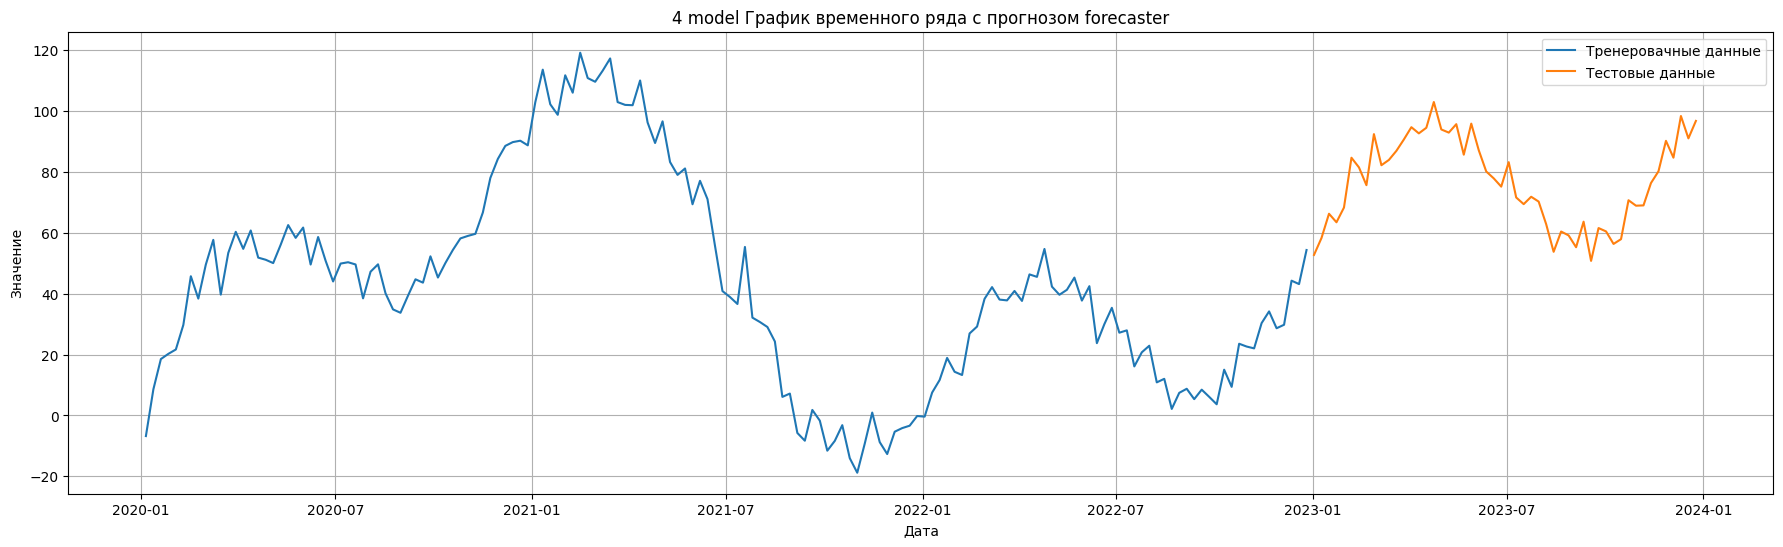

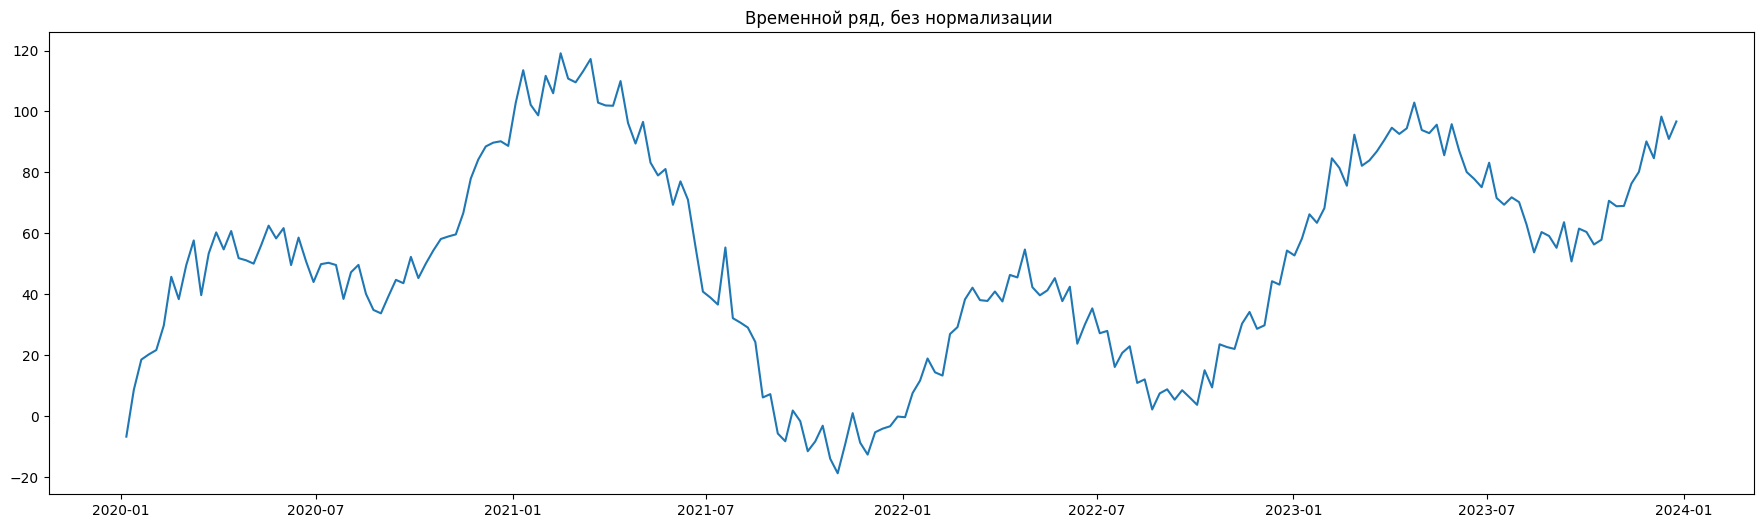

coef_hurst


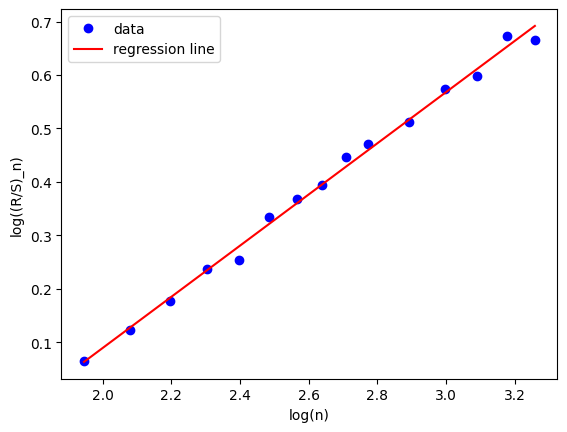

Hurst exponent: 0.9791968167603663
Положительные дальнодействующия корреляция hurst


Энтропия вашего временного ряда: 7.700439718141095
Ожидаемая энтропия для нормального распределения с std dev 33.16153538671821 : 7.098534485560403


         lb_stat      lb_pvalue      bp_stat      bp_pvalue        result
1     194.410344   3.465012e-44   191.633053   1.399196e-43  не белый шум
2     380.311638   2.608417e-83   373.993371   6.142872e-82  не белый шум
3     558.055319  1.247044e-120   547.505059  2.413860e-118  не белый шум
4     724.734054  1.535838e-155   709.421544  3.178089e-152  не белый шум
5     878.876026  9.924020e-188   858.425451  2.643452e-183  не белый шум
..           ...            ...          ...            ...           ...
142  3592.948931   0.000000e+00  2798.307796   0.000000e+00  не белый шум
143  3602.443691   0.000000e+00  2801.246651   0.000000e+00  не белый шум
144  3611.585074   0.000000e+00  2804.032596   0.000000e+00  не белый шум
145  3620.617405   0.000

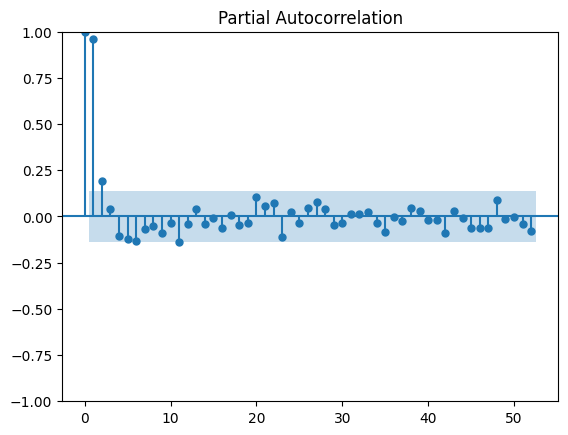

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00  9.64487340e-01  2.17800750e-01  5.09740022e-02
 -1.20175552e-01 -1.51222009e-01 -1.69123576e-01 -9.42924731e-02
 -6.41483102e-02 -1.06042320e-01 -4.22614663e-02 -1.65446946e-01
 -6.08592352e-02  5.17423072e-02 -3.63746928e-02 -6.77703401e-04
 -7.26282254e-02  1.15144233e-02 -5.67816960e-02 -3.98975308e-02
  1.36570169e-01  9.59934956e-02  1.24137406e-01 -1.30698404e-01
  1.65548081e-02 -5.78942597e-02  6.30791109e-02  1.17111622e-01
  7.57019992e-02 -5.77383950e-02 -8.13610244e-02 -3.59629149e-03
  1.69670582e-02  5.60466663e-02 -4.09870562e-02 -1.48329873e-01
 -4.55394425e-02 -6.03342656e-02  7.86513607e-02  8.47072713e-02
  4.47512035e-03 -5.16379799e-02 -1.87498242e-01  1.12987569e-02
  9.65056251e-03 -4.46596864e-02 -1.00144548e-01 -1.47433131e-01
  1.03403968e-01  8.42788241e-03  5.48580130e-02 -4.79829734e-02
 -1.55191935e-01]




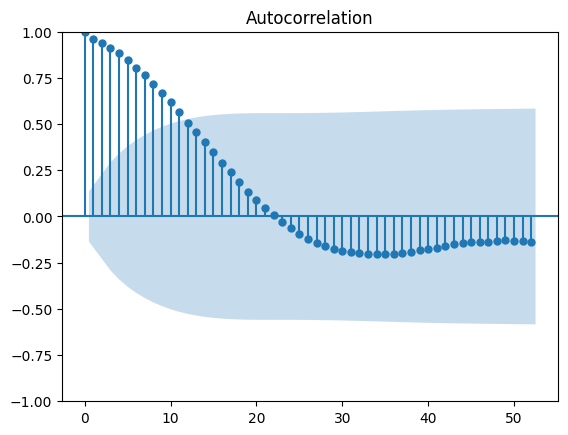

Autocorrelation Function (ACF): 
 [ 1.          0.95985038  0.93633984  0.91334047  0.8822951   0.84638345
  0.80513569  0.76308022  0.71897794  0.6692769   0.62031693  0.56284421
  0.50754676  0.45695459  0.40087495  0.3467175   0.29014065  0.23820044
  0.18427018  0.13025285  0.08751275  0.04615608  0.0101921  -0.03128292
 -0.06440649 -0.09628782 -0.12244551 -0.141908   -0.15825478 -0.17577196
 -0.18698563 -0.19427001 -0.19911448 -0.20203678 -0.20403997 -0.20550446
 -0.20271747 -0.19833112 -0.19155592 -0.18359824 -0.17689231 -0.16796252
 -0.16172037 -0.15146696 -0.14244565 -0.14058287 -0.13852839 -0.13906498
 -0.13153286 -0.12930742 -0.13038584 -0.13266293 -0.13885748]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд НЕ стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.21370175541646458
p_value 0.010861841718825782
lags 9
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стациона

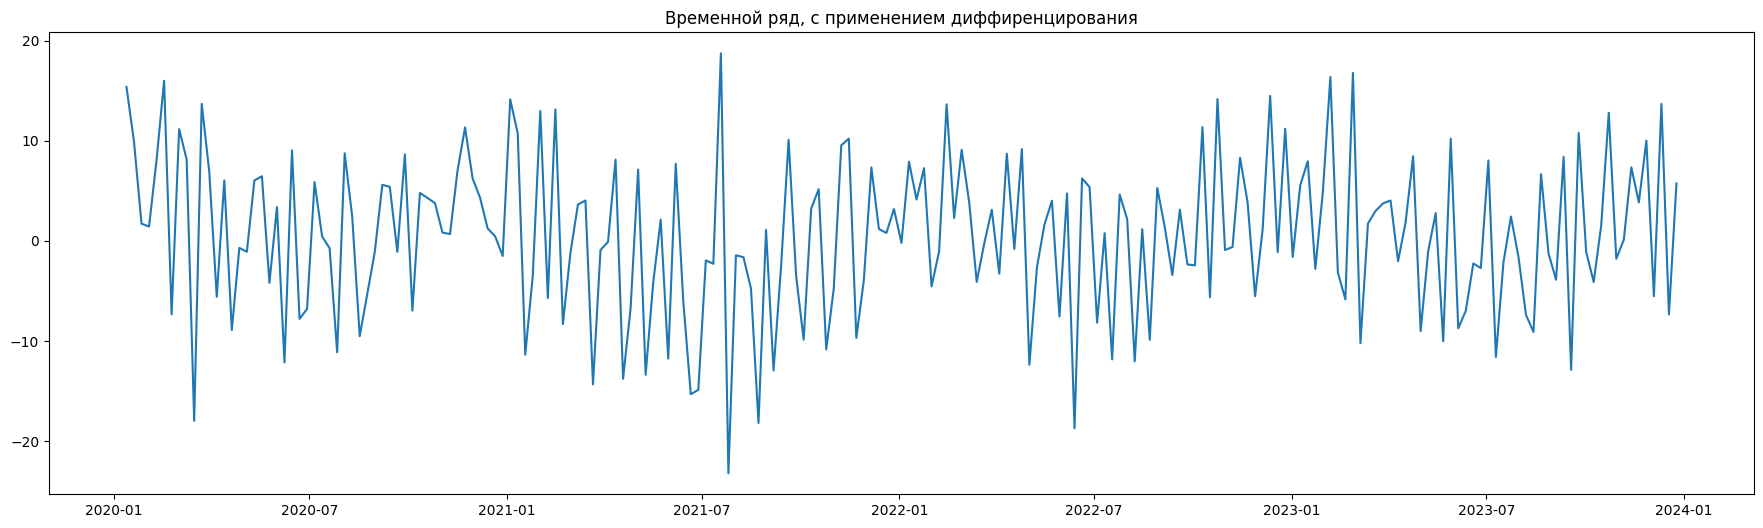

coef_hurst


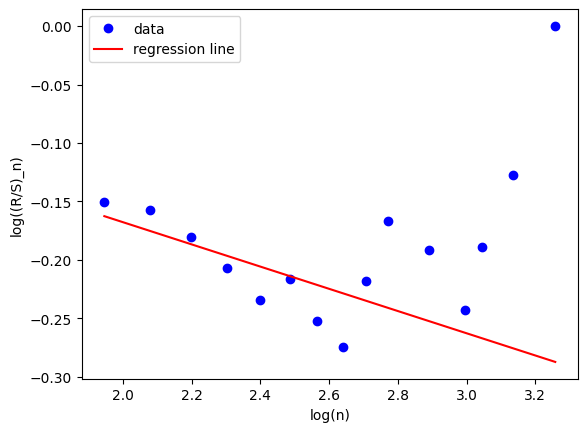

Hurst exponent: 0.4049161823494589
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.693486957499326
Ожидаемая энтропия для нормального распределения с std dev 7.8903919985858915 : 5.027192561004629


     lb_stat  lb_pvalue    bp_stat  bp_pvalue        result
1   9.196374   0.002425   9.064368   0.002606  не белый шум
2   9.204455   0.010029   9.072295   0.010715  не белый шум
3  17.388213   0.000588  17.060269   0.000687  не белый шум
4  18.445699   0.001010  18.087397   0.001186  не белый шум
5  24.230965   0.000196  23.678898   0.000250  не белый шум
6  26.311612   0.000195  25.679902   0.000255  не белый шум
7  26.482786   0.000413  25.843706   0.000537  не белый шум




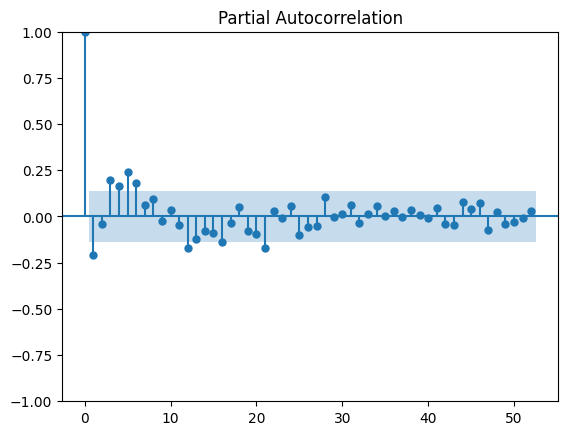

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00 -2.10274556e-01 -3.97232189e-02  2.01559648e-01
  1.70580855e-01  2.47153412e-01  1.88049406e-01  6.85924814e-02
  1.03253764e-01 -2.19988216e-02  3.94977805e-02 -4.79727714e-02
 -1.81297366e-01 -1.37540670e-01 -9.04930115e-02 -1.04937283e-01
 -1.58876899e-01 -4.49744190e-02  5.34800411e-02 -8.90608083e-02
 -1.11598600e-01 -1.98744213e-01  2.58282461e-02 -1.25387644e-02
  6.42426842e-02 -1.15398614e-01 -7.03649665e-02 -6.71705131e-02
  1.23474912e-01  1.49764387e-03  2.19053649e-02  7.83322836e-02
 -3.61538832e-02  2.33545278e-02  8.13061027e-02  1.58661442e-02
  4.83008964e-02  8.64379762e-03  5.62171326e-02  1.79855738e-02
  4.37815525e-04  6.56339288e-02 -4.83144087e-02 -6.00041873e-02
  9.99634331e-02  6.00922597e-02  1.08407719e-01 -9.56961969e-02
  3.22536276e-02 -5.83793453e-02 -4.40778373e-02 -1.52078426e-02
  3.35311274e-02]




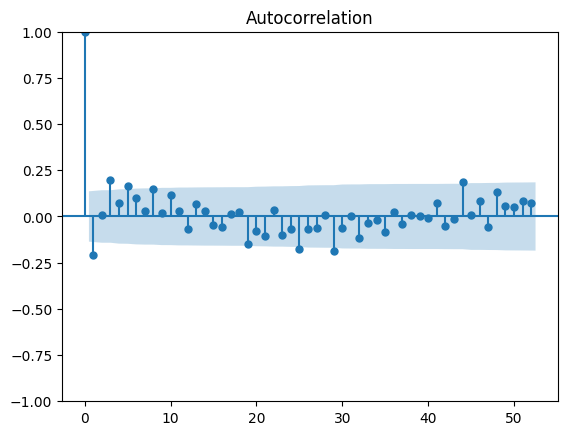

Autocorrelation Function (ACF): 
 [ 1.         -0.20925874  0.00618818  0.19644146  0.07044126  0.16435353
  0.09831931  0.02813043  0.14882702  0.01626576  0.11495561  0.02797001
 -0.06727308  0.0679156   0.03129637 -0.0434652  -0.0561254   0.01597449
  0.02351678 -0.14763859 -0.07617596 -0.10754061  0.03645472 -0.09996956
 -0.06601993 -0.17521819 -0.06548356 -0.06456931  0.00775581 -0.18898687
 -0.06397111  0.00176679 -0.11511501 -0.03305749 -0.02120589 -0.08546899
  0.02315302 -0.04338994  0.00815237  0.00279801 -0.00695388  0.07557385
 -0.04990977 -0.01280604  0.18812039  0.00586987  0.08438958 -0.05748132
  0.13064252  0.05423747  0.05180587  0.08287207  0.07054169]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд НЕ стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.15047644835546797
p_value 0.04626962637044335
lags 5
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационар

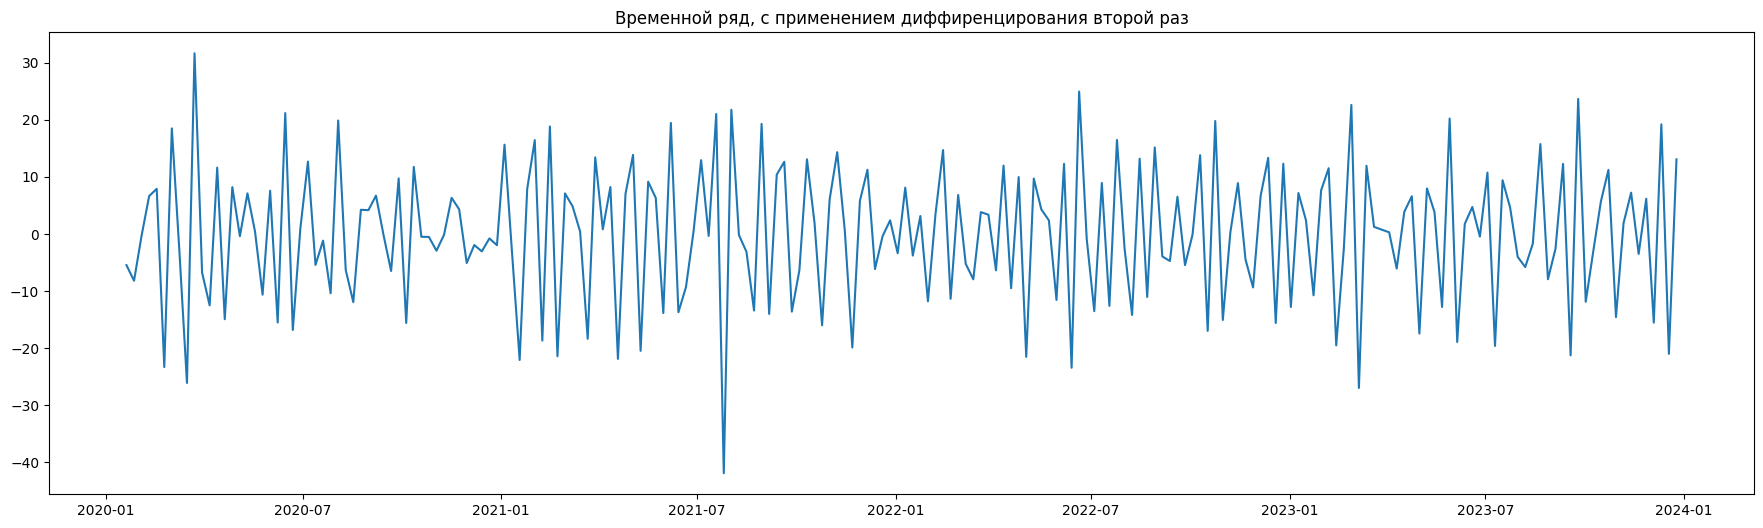

coef_hurst


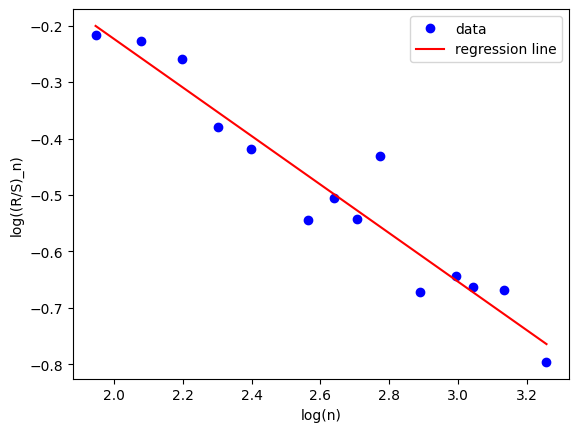

Hurst exponent: 0.07064010998284659
Отрицательная дальнодействующия корреляция hurs


Энтропия вашего временного ряда: 7.6865005271832185
Ожидаемая энтропия для нормального распределения с std dev 12.25128530276747 : 5.661956792778006


     lb_stat     lb_pvalue    bp_stat     bp_pvalue        result
1  72.514826  1.657818e-17  71.468939  2.816573e-17  не белый шум




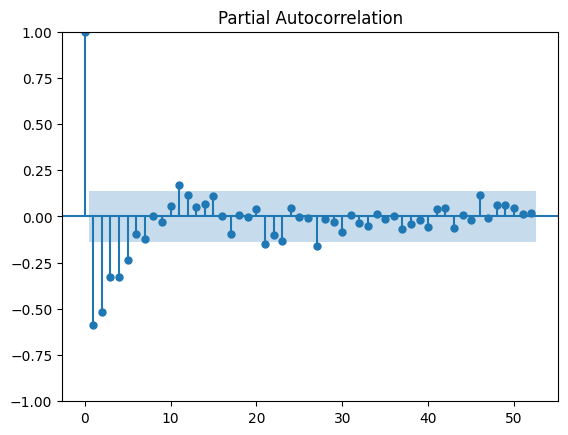

Partial Autocorrelation Function (PACF): 
 [ 1.00000000e+00 -5.91886475e-01 -5.22287517e-01 -3.42937683e-01
 -3.47947444e-01 -2.67654065e-01 -1.30618671e-01 -1.59720214e-01
 -2.83193196e-02 -5.61176334e-02  4.99699744e-02  1.93630433e-01
  1.61911788e-01  1.08126401e-01  1.29661644e-01  1.84837752e-01
  6.56187365e-02 -8.24857035e-02 -1.68197185e-03 -2.99281511e-02
  8.93926517e-03 -2.26028783e-01 -2.17717083e-01 -3.07981450e-01
 -1.26773210e-01 -1.40175610e-01 -1.12364913e-01 -3.03686792e-01
 -1.63725037e-01 -1.49299314e-01 -2.12047262e-01 -8.14207602e-02
 -6.17592321e-02 -3.92519892e-02  1.21669747e-01  2.12039893e-01
  3.70782200e-01  4.51952056e-01  7.64310848e-01  2.92815062e+00
 -1.41189868e+00 -6.33384497e-01 -5.40313729e-01 -9.53513008e-01
 -1.58522084e+01  1.06384250e+00  6.38328196e-01  3.37233039e-01
  3.40597319e-01  3.02419156e-01  2.81591889e-01  2.35902160e-01
  2.61684475e-01]




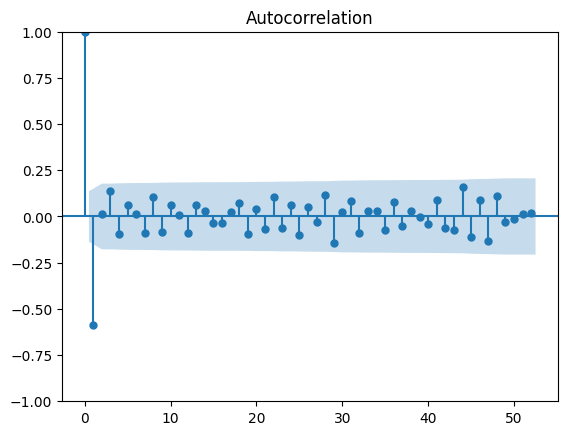

Autocorrelation Function (ACF): 
 [ 1.         -0.58901324  0.01090792  0.1351913  -0.09748346  0.06388526
  0.01238593 -0.08725646  0.10732036 -0.08624618  0.06403525  0.00763728
 -0.09052637  0.06401377  0.02708822 -0.03342403 -0.03306912  0.02302988
  0.07293387 -0.09334536  0.03891092 -0.06659126  0.10599817 -0.06212639
  0.06077133 -0.10067322  0.04978554 -0.02928277  0.11795678 -0.14340999
  0.02455458  0.08528579 -0.08711268  0.02789627  0.0298222  -0.07491562
  0.07725437 -0.05326624  0.03020927 -0.00377467 -0.03810131  0.08715933
 -0.06435032 -0.07275916  0.16046791 -0.11124565  0.09101664 -0.13466104
  0.11301051 -0.03226661 -0.01260137  0.01174666  0.01712245]


Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.04442835039186273
p_value 0.1
lags 13
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


Тест на стационарность Дики-Фуллера

<ipython-input-38-85a912228d4f>:88: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


ZeroDivisionError: division by zero

In [48]:
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from math import sqrt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import bayesian_search_forecaster

from lightgbm import LGBMRegressor

import random


random.seed(1)
np.random.seed(1)

# Определение количества периодов
n_periods = 1460  # Примерное количество периодов в вашем временном ряду
train_size = 1096
valid_size = 183
seasonality_amplitude = 100  # Амплитуда сезонности
end_train = '2023-01-01 23:59:59'


# Генерация значений временного ряда
trend_slope = 0.5
noise_level = 3.0


# Создаем временной ряд
time = np.arange(1, 1461)

# Создаем сезонность с уменьшенной амплитудой

seasonality = 0.3 * np.sin(time * 2 * np.pi / 365)

# Создаем тренд
trend = np.where(time <= 365, time / 365,
                 np.where(time <= 730, (730 - time) / 365,
                          (time - 730) / 730))

# Генерируем шум
noise = np.random.normal(loc=0, scale=0.05, size=len(time))

# Комбинируем тренд, сезонность и шум
values_seasonal = trend + seasonality + noise


# Создание датафрейма с датами и значениями
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=n_periods, freq='D'),
    'Values': values_seasonal
})
# ==============================================================================
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data = data.set_index('Date')
data = data.asfreq('W-MON')
data = data['Values']
print(data.dtypes)


data = data.sort_index()
data=data * 100

# # Генерация случайной даты в указанном интервале
# random_date = random.choice(pd.date_range(start='2020-01-01', end='2023-01-01',freq='MS'))

# # Умножение значения в случайно выбранной точке на 1.5
# data.loc[random_date] *= 1.5



# Добавление прогноза на график
plt.figure(figsize=(22, 6))
plt.plot(data.index[data.index<=end_train], data[:end_train], label='Тренеровачные данные')
plt.plot(data.index[data.index>=end_train], data[end_train:],label='Тестовые данные')
# Добавление точки на график
# plt.plot(random_date, data.loc[random_date], 'ro')  # 'ro' означает красные круглые маркеры
# plt.plot(random_date, data.loc[random_date]/1.5, 'yo')  # 'ro' означает красные круглые маркеры

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('4 model График временного ряда с прогнозом forecaster')
plt.legend()
plt.grid(True)
plt.show()
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(data)
data_diff = pd.Series(data_diff, index=data.index).dropna()
data_diff
# ==================================== декомпощиция данных на тренд шум и сезонность

# # Преобразуем данные в pandas.Series
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='1/1/2020', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
# print()
# print()

# # Визуализируем результаты

# figure = result.plot()

# figure.set_size_inches(22, 12)
# figure.suptitle('Seasonal Decomposition', fontsize=16)


# plt.show()
# data_series = pd.Series(data.tolist(), index=pd.date_range(start='2020-01-01',freq='MS', periods=len(data)))

# # Применяем декомпозицию
# result = seasonal_decompose(data_series, model='additive', period=12)
print('======================================')
print('======================================')
print('======================================')
metrics_stats(data, 'без нормализации ')
print('Применяем diff для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff===================')
print('===================diff===================')
print('===================diff===================')
metrics_stats(data.diff(1).dropna(), 'с применением диффиренцирования')
data_2 = data.diff(1).dropna()
print('Применяем diff_2 для того чтобы избавиться от сезонности и тренда, переводим данные временного ряда в стационрный вид')
print('===================diff_2===================')
print('===================diff_2===================')
print('===================diff_2===================')
metrics_stats(data_2.diff(1).dropna(), 'с применением диффиренцирования второй раз')
22/0
stl = STL(data, seasonal=13)
result = stl.fit()

fig, axes = plt.subplots(4, 1, sharex=False)
fig.suptitle('STL Decomposition', fontsize=16)
fig.set_size_inches(22, 12)

# График исходных данных
axes[0].plot(result.observed)
axes[0].set_title('Observed')
axes[0].grid(True)

# График тренда
axes[1].plot(result.trend)
axes[1].set_title('Trend')
axes[1].grid(True)

# График сезонности
axes[2].plot(result.seasonal)
axes[2].set_title('Seasonality')
axes[2].grid(True)

# График остатка
axes[3].plot(result.resid)
axes[3].set_title('Residuals')
axes[3].grid(True)

# Добавляем пространство между графиками
plt.subplots_adjust(hspace=0.5)

# Показываем графики
plt.show()
# ===================================


print()

#=======================================

acf_values_1 = acf(data)

# Создание подграфика с нужным размером
fig, ax = plt.subplots(figsize=(22, 6))

# Построение графика автокорреляционной функции с указанием подграфика для отображения
plot_acf(data, lags=47, ax=ax)

# Отображение графика
plt.show()
print()
#============================================

# Обучение модели ARIMA
model = ARIMA(data.loc[:end_train], order=(5,1,0))
model_fit = model.fit()

# Прогноз
forecast = model_fit.get_forecast(steps=len(data.loc[end_train:]))

# Получаем прогноз и доверительные интервалы
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# График оригинальных данных
plt.figure(figsize=(22,6))
plt.plot(data, label='original data')

# График прогноза
plt.plot(forecast_mean, label='mean', color='red')
plt.title('ARIMA')

# График доверительных интервалов
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.grid(True)

plt.legend()
plt.show()
print()
#=======================================

# Data partition train-test
# ==============================================================================
end_train = '2023-01-01 23:59:59'
end_valid = '2023-06-01 23:59:59'

print(
    f"Train dates : {data.index.min()} --- {data.loc[:end_train].index.max()}  "
    f"(n={len(data.loc[:end_train])})")
print(
    f"Valid dates  : {data.loc[end_train:].index.min()} --- {data.loc[:end_valid].index.max()}  "
    f"(n={len(data.loc[end_train:end_valid])})")

print(
    f"Test dates  : {data.loc[end_valid:].index.min()} --- {data.index.max()}  "
    f"(n={len(data.loc[end_valid:])})")


#=================================метрики R============
import nolds
from scipy.stats import entropy
from scipy.fft import fft
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

coef_hurst = nolds.hurst_rs(data)




# Применение быстрого преобразования Фурье (FFT) к временному ряду
fft_result = fft(data.tolist())
# Вычисление амплитудного спектра
amplitude_spectrum = np.abs(fft_result)
# Нормализация амплитудного спектра
normalized_spectrum = amplitude_spectrum / np.sum(amplitude_spectrum)
# Вычисление спектральной энтропии
feat_spectral = entropy(normalized_spectrum,base=len(data))


box_pierce = acorr_ljungbox(data,boxpierce=True)
ljung_box = acorr_ljungbox(data)



sm.graphics.tsa.plot_pacf(data, lags=52, method="ywm")
plt.show()

unitroot_kpss = kpss(data, regression = "ct",nlags='legacy')

shift_level_index= data.rolling(window=10).mean().idxmax()
print()
print('CТАТИСТИКА ОСНОВАНАЯ НА R')
print()
print('coef_hurst коэффициент Херста',coef_hurst)
print()
print('feat_spectral спектральную энтропию (Шеннона)',feat_spectral)
print()
print('box_pierce статистика Бокс-Пирса для проверки того, является ли временной ряд белым шумом,\n',box_pierce)
print()
print('ljung_box cтатистика Юнга-Бокса для проверки того, является ли временной ряд белым шумом,\n',ljung_box)
print()
print('unitroot_kpss статистика Квятковского-Филлипса-Шмидта-Шина (KPSS) для проверки, является ли ряд стационарным, \n',unitroot_kpss)
print()
print('shift_level_index указывает индекс, при котором происходит наибольший средний сдвиг',shift_level_index)
print()
#=================================метрики R============


# Forecasting with differentiation
# ==============================================================================
steps = len(data.loc[end_train:])

# Forecasters
forecaster_rf = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )


forecaster_gb = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )


forecaster_lgb = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )



# Train
forecaster_rf.fit(data.loc[:end_train])
# Теперь можно смотреть использованные лаги

forecaster_gb.fit(data.loc[:end_train])

forecaster_lgb.fit(data.loc[:end_train])
# best params forecast 52 week ===================================

lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb_52(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space


forecaster_cb_52_best_params = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

# Regressor hyperparameters search space
def search_space_gb_52(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

forecaster_gb_52_best_params = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


def search_space_lg_52(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb

forecaster_lg_52_best_params = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )



bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params,
                                   y                  = data.loc[:end_valid],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params.fit(data.loc[:end_train])
forecaster_gb_52_best_params.fit(data.loc[:end_train])
forecaster_lg_52_best_params.fit(data.loc[:end_train])

predict_cb_52_best_params = forecaster_cb_52_best_params.predict(steps=steps)
predict_gb_52_best_params = forecaster_gb_52_best_params.predict(steps=steps)
predict_lg_52_best_params = forecaster_lg_52_best_params.predict(steps=steps)
#==========================52 huper tuning + exog



calendar_features_52 = pd.DataFrame(index=data.index)
calendar_features_52['Values'] = data
calendar_features_52['month'] = calendar_features_52.index.month
calendar_features_52['week_of_year'] = calendar_features_52.index.isocalendar().week
calendar_features_52['year'] = calendar_features_52.index.year


forecaster_cb_52_best_params_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )

forecaster_gb_52_best_params_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )

forecaster_lg_52_best_params_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )

bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

bayesian_search_forecaster(
                                   forecaster         = forecaster_lg_52_best_params_exog,
                                   y                  = calendar_features_52.loc[:end_valid,'Values'],
                                   exog               = calendar_features_52.loc[:end_valid,['month',	'week_of_year','year']],
                                   steps              = 52,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lg_52,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )


forecaster_cb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_gb_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )

forecaster_lg_52_best_params_exog.fit(y = calendar_features_52.loc[:end_train,'Values'],
                                      exog =calendar_features_52.loc[:end_train,['month',	'week_of_year','year']]
                                      )


predict_cb_52_best_params_exog = forecaster_cb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_gb_52_best_params_exog = forecaster_gb_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )

predict_lg_52_best_params_exog = forecaster_lg_52_best_params_exog.predict(
                                                        steps=steps,
                                                        exog = calendar_features_52.loc[end_train:,['month',	'week_of_year','year']]
                                                                      )


# Backtesting ======================================
forecaster_cb_back = ForecasterAutoreg(
                    regressor       = CatBoostRegressor(random_state=963,silent=True), #CatBoostRegressor(random_state=963,silent=True,learning_rate=0.5,depth = 9, iterations=300)  CatBoostRegressor(random_state=963,silent=True, learning_rate=0.1, depth=12, iterations=100)
                    lags            = 52,
                    differentiation = 1

                )
forecaster_gb_back = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_lgb_back = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                )

forecaster_cb_back.fit(data.loc[:end_train])
forecaster_gb_back.fit(data.loc[:end_train])
forecaster_lgb_back.fit(data.loc[:end_train])




_, predictions_cb_back = backtesting_forecaster(
                          forecaster         = forecaster_cb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
_, predictions_gb_back = backtesting_forecaster(
                          forecaster         = forecaster_gb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )
_, predictions_lgb_back = backtesting_forecaster(
                          forecaster         = forecaster_lgb_back,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                          # allow_incomplete_fold = True
                      )



# ==============================================================================
# ===============================================
# Hyperparameters search tuning
# ==============================================================================
forecaster_cb_ht = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True),
                 lags      = 52,
                 differentiation = 1
             )
forecaster_gb_ht = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963),
                    lags            = 52,
                    differentiation = 1
                    )
forecaster_lgb_ht = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1),
                    lags            = 52,
                    differentiation = 1
                    )


# Lags used as predictors
lags_grid = [4, 8, [1, 2, 3, 27 ,52]]

# Regressor hyperparameters search space
def search_space_cb(trial):
    search_space  = {
        'depth' : trial.suggest_int('depth', 9, 12, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'iterations' : trial.suggest_int('iterations', 100, 300, step=100)
    }
    return search_space

# Regressor hyperparameters search space
def search_space_gb(trial):
    search_space_gb  = {
        'max_depth' : trial.suggest_int('max_depth', 9, 12, step=1),
        # '‍learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha' : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'n_estimators' : trial.suggest_int('n_estimators', 600, 1200, step=100)
    }
    return search_space_gb

def search_space_lgb(trial):
    search_space_lgb  = {
        'n_estimators'  : trial.suggest_int('n_estimators', 600, 1200, step=100),
        'max_depth'     : trial.suggest_int('max_depth', 3, 10, step=1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'     : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'    : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
    }
    return search_space_lgb


frozen_trial_cb = bayesian_search_forecaster(
                                   forecaster         = forecaster_cb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_cb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_gb = bayesian_search_forecaster(
                                   forecaster         = forecaster_gb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_gb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

frozen_trial_lgb = bayesian_search_forecaster(
                                   forecaster         = forecaster_lgb_ht,
                                   y                  = data.loc[:end_valid],
                                   steps              = 10,
                                   metric             = 'mean_absolute_error',
                                   search_space       = search_space_lgb,
                                   lags_grid          = lags_grid,
                                   initial_train_size = len(data[:end_train]),
                                   refit              = False,
                                   n_trials           = 20, # Increase for more exhaustive search
                                   random_state       = 123,
                                   return_best        = True,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = False
                               )

metric_cb_back_ht, predictions_cb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_cb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )
metric_gb_back_ht, predictions_gb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_gb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

metric_lgb_back_ht, predictions_lgb_back_ht = backtesting_forecaster(
                          forecaster         = forecaster_lgb_ht,
                          y                  = data,
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data.loc[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )


# Predict
predictions_rf = forecaster_rf.predict(steps=steps)
predictions_gb = forecaster_gb.predict(steps=steps)
predictions_lgb = forecaster_lgb.predict(steps=steps)


# Расчет MAE
error_rf_mae = mean_absolute_error(data.loc[end_train:], predictions_rf)
error_gb_mae = mean_absolute_error(data.loc[end_train:], predictions_gb)
error_lgb_mae = mean_absolute_error(data.loc[end_train:], predictions_lgb)

# Расчет RMSE
error_rf_rmse = mean_squared_error(data.loc[end_train:], predictions_rf, squared=False)
error_gb_rmse = mean_squared_error(data.loc[end_train:], predictions_gb, squared=False)
error_lgb_rmse = mean_squared_error(data.loc[end_train:], predictions_lgb, squared=False)

# Расчет R2
r2_rf = r2_score(data.loc[end_train:], predictions_rf)
r2_gb = r2_score(data.loc[end_train:], predictions_gb)
r2_lgb = r2_score(data.loc[end_train:], predictions_lgb)

mape_rf = mean_absolute_percentage_error(data.loc[end_train:], predictions_rf)
mape_gb = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb)
mape_lgb = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb)

# backtesting errors___________
# Расчет MAE

error_cb_back = mean_absolute_error(data.loc[end_train:], predictions_cb_back)
error_gb_back = mean_absolute_error(data.loc[end_train:], predictions_gb_back)
error_lgb_back = mean_absolute_error(data.loc[end_train:], predictions_lgb_back)

# Расчет RMSE
error_rmse_cb_back = mean_squared_error(data.loc[end_train:], predictions_cb_back, squared=False)
error_rmse_gb_back= mean_squared_error(data.loc[end_train:], predictions_gb_back, squared=False)
error_rmse_lgb_back= mean_squared_error(data.loc[end_train:], predictions_lgb_back, squared=False)

# Расчет R2
r2_cb_back = r2_score(data.loc[end_train:], predictions_cb_back)
r2_gb_back = r2_score(data.loc[end_train:], predictions_gb_back)
r2_lgb_back = r2_score(data.loc[end_train:], predictions_lgb_back)

mape_cb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back)
mape_gb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back)
mape_lgb_back = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back)

#===========================================

# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_cb_back_ht)
error_gb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_gb_back_ht)
error_lgb_back_ht = mean_absolute_error(data.loc[end_train:], predictions_lgb_back_ht)

# Расчет RMSE
error_rmse_cb_back_ht = mean_squared_error(data.loc[end_train:], predictions_cb_back_ht, squared=False)
error_rmse_gb_back_ht = mean_squared_error(data.loc[end_train:], predictions_gb_back_ht, squared=False)
error_rmse_lgb_back_ht = mean_squared_error(data.loc[end_train:], predictions_lgb_back_ht, squared=False)

# Расчет R2
r2_cb_back_ht = r2_score(data.loc[end_train:], predictions_cb_back_ht)
r2_gb_back_ht = r2_score(data.loc[end_train:], predictions_gb_back_ht)
r2_lgb_back_ht = r2_score(data.loc[end_train:], predictions_lgb_back_ht)

mape_cb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_back_ht)
mape_gb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_back_ht)
mape_lgb_back_ht = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_back_ht)

#===========================================
# baseline ____________________________

forecaster_bz = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz.fit(y=data.loc[:end_train])

# Predict
# ==============================================================================
predictions_bz = forecaster_bz.predict(steps=len(data.loc[end_train:]))

# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz.plot(ax=ax, label='predictions')
ax.set_title(f'4_1 model Forecast baseline')
ax.legend()
plt.show()
print()
#=========================================================

# Backtesting baseline ========================================

forecaster_bz_back = ForecasterEquivalentDate(
                 offset    = pd.DateOffset(weeks=52),
                 n_offsets = 2,
                 agg_func  = np.mean
             )

forecaster_bz_back.fit(y=data.loc[:end_train])


_ ,predictions_bz_bg = backtesting_forecaster(
                          forecaster         = forecaster_bz_back,
                          y                  = data,
                          initial_train_size = len(data.loc[:end_train]),
                          steps              = 10,
                          metric             = ['mean_absolute_error','mean_squared_error'],
                          refit              = False,
                          verbose            = False,
                          n_jobs             = 'auto',
                          show_progress=False
                          # fixed_train_size      = False
                      )



# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(22, 6))
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_bz_bg.plot(ax=ax, label='predictions')
ax.set_title(f'4_2 model Forecast baseline backtest ')
ax.legend()
plt.show()
print()
#====================================================

# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_rf.plot(ax=ax, label='Catboost')
predictions_gb.plot(ax=ax, label='XGB')
predictions_lgb.plot(ax=ax, label='LGBM')
ax.set_title(f'4_1_1 model Forecasting with differentiation 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params.plot(ax=ax, label='Catboost')
predict_gb_52_best_params.plot(ax=ax, label='XGB')
predict_lg_52_best_params.plot(ax=ax, label='LGBM')
ax.set_title(f' 4_1_2 model Forecasting with differentiation Huper tuning 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()

#================================================
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predict_cb_52_best_params_exog.plot(ax=ax, label='Catboost')
predict_gb_52_best_params_exog.plot(ax=ax, label='XGB')
predict_lg_52_best_params_exog.plot(ax=ax, label='LGBM')
ax.set_title(f'4_1_3 model Forecasting with differentiation Huper tuning EXOG 52 недели рекурентно без добавление новых данных')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()




#==============Backtesting plots
# Plot
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'4_2_1 model Forecasting with differentiation with Backtesting по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()
#================back_ht
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
data.loc[:end_train].plot(ax=ax, label='train')
data.loc[end_train:].plot(ax=ax, label='test')
predictions_cb_back_ht['pred'].plot(ax=ax, label='Catboost')
predictions_gb_back_ht['pred'].plot(ax=ax, label='XGB')
predictions_lgb_back_ht['pred'].plot(ax=ax, label='XGB')
ax.set_title(f'4_2_2 Forecasting with differentiation with Backtesting with Hyper Tuning по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()



# ==================================== добавление фичей новых из календаря дат
# ==================================== добавление фичей новых из календаря дат

calendar_features = pd.DataFrame(index=data.index)
calendar_features['Values'] = data
calendar_features['month'] = calendar_features.index.month
calendar_features['week_of_year'] = calendar_features.index.isocalendar().week
calendar_features['year'] = calendar_features.index.year


params = {
    'depth': 9,
    'learning_rate': 0.153920,
    'iterations': 200
}

forecaster_cb_best_par_exog = ForecasterAutoreg(
                 regressor = CatBoostRegressor(random_state=963,silent=True,**params),
                 lags      = [1, 2, 3, 27, 52],
                 differentiation = 1
             )

metric_ex, predictions_cb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_cb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_gb= {
    'n_estimators': 900,
    'max_depth': 11,
    'reg_alpha': 0.3,
    'reg_lambda': 0.2
}

forecaster_gb_best_par_exog = ForecasterAutoreg(
                    regressor       = XGBRegressor(random_state=963,**params_gb),
                    lags            = [1, 2, 3, 4],
                    differentiation = 1
                    )

_, predictions_gb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_gb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

params_lgb= {
    'n_estimators': 1200,
    'max_depth': 8,
    'learning_rate': 0.4950998563546329,
    'reg_alpha': 1.0,
    'reg_lambda': 0.0
}

forecaster_lgb_best_par_exog = ForecasterAutoreg(
                    regressor       = LGBMRegressor(random_state=963,verbose=-1,**params_lgb),
                    lags            = [1,2,3,4,5, 6, 7, 8],
                    differentiation = 1
                    )

_, predictions_lgb_best_par_exog = backtesting_forecaster(
                          forecaster         = forecaster_lgb_best_par_exog,
                          y                  = calendar_features['Values'],
                          exog               = calendar_features.iloc[:,1:],
                          steps              = 10,
                          metric             = 'mean_absolute_error',
                          initial_train_size = len(data[:end_train]),
                          refit              = False,
                          n_jobs             = 'auto',
                          verbose            = False,
                          show_progress      = False
                      )

print()


#================back_ht_exog
fig, ax = plt.subplots(figsize=(22, 6), sharex=True, sharey=True)
calendar_features.loc[:end_train,'Values'].plot(ax=ax, label='train')
calendar_features.loc[end_train:,'Values'].plot(ax=ax, label='test')
predictions_cb_best_par_exog['pred'].plot(ax=ax, label='Catboost')
predictions_gb_best_par_exog['pred'].plot(ax=ax, label='XGB')
predictions_lgb_best_par_exog['pred'].plot(ax=ax, label='LGBM')
ax.set_title(f'4_2_3 Forecasting with differentiation with Backtesting with Hyper Tuning with Exog по 10 недель добавляет данные из test в обучение')
ax.set_xlabel('')
ax.grid(True)
ax.legend()
plt.show()
print()


#===========================================


# backtesting hyper tuning errors___________
# Расчет MAE

error_cb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_cb_best_par_exog)
error_gb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_gb_best_par_exog)
error_lgb_back_ht_exog = mean_absolute_error(data.loc[end_train:], predictions_lgb_best_par_exog)

# Расчет RMSE
error_rmse_cb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_cb_best_par_exog, squared=False)
error_rmse_gb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_gb_best_par_exog, squared=False)
error_rmse_lgb_back_ht_exog = mean_squared_error(data.loc[end_train:], predictions_lgb_best_par_exog, squared=False)

# Расчет R2
r2_cb_back_ht_exog = r2_score(data.loc[end_train:], predictions_cb_best_par_exog)
r2_gb_back_ht_exog = r2_score(data.loc[end_train:], predictions_gb_best_par_exog)
r2_lgb_back_ht_exog = r2_score(data.loc[end_train:], predictions_lgb_best_par_exog)

mape_cb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_cb_best_par_exog)
mape_gb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_gb_best_par_exog)
mape_lgb_back_ht_exog = mean_absolute_percentage_error(data.loc[end_train:], predictions_lgb_best_par_exog)

#===========================================

#baseline ________________errors

# Calculate the metrics
mae_bz = mean_absolute_error(data.loc[end_train:], predictions_bz)
rmse_bz = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz))
r2_bz = r2_score(data.loc[end_train:], predictions_bz)
mape_1_bz = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz)


#==============52 недели без обучения дучшая модель ================

# Расчет MAE

error_cb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params)
error_gb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params)
error_lgb_ht_52 = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params)

# Расчет RMSE
error_rmse_cb_ht_52 = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params, squared=False)
error_rmse_gb_ht_52 = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params, squared=False)
error_rmse_lgb_ht_52 = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params, squared=False)

# Расчет R2
r2_cb_back_ht_52 = r2_score(data.loc[end_train:], predict_cb_52_best_params)
r2_gb_back_ht_52 = r2_score(data.loc[end_train:], predict_gb_52_best_params)
r2_lgb_back_ht_52 = r2_score(data.loc[end_train:], predict_lg_52_best_params)

mape_cb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params)
mape_gb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params)
mape_lgb_back_ht_52 = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params)

#==============52 недели без обучения + EXOG дучшая модель ================


# Расчет MAE

error_cb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_cb_52_best_params_exog)
error_gb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_gb_52_best_params_exog)
error_lgb_ht_52_exog = mean_absolute_error(data.loc[end_train:], predict_lg_52_best_params_exog)

# Расчет RMSE
error_rmse_cb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_cb_52_best_params_exog, squared=False)
error_rmse_gb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_gb_52_best_params_exog, squared=False)
error_rmse_lgb_ht_52_exog = mean_squared_error(data.loc[end_train:], predict_lg_52_best_params_exog, squared=False)

# Расчет R2
r2_cb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_cb_52_best_params_exog)
r2_gb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_gb_52_best_params_exog)
r2_lgb_back_ht_52_exog = r2_score(data.loc[end_train:], predict_lg_52_best_params_exog)

mape_cb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_cb_52_best_params_exog)
mape_gb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_gb_52_best_params_exog)
mape_lgb_back_ht_52_exog = mean_absolute_percentage_error(data.loc[end_train:], predict_lg_52_best_params_exog)

#=======================================

print()
print('4_1 model Baseline _errors ')
print(f'Error (MAE) baseline - средняя абсолютная ошибка: {mae_bz:.2f}')
print(f'Error (RMSE) baseline - Среднеквадратичная ошибка: {rmse_bz:.2f}')
print(f'R2 baseline - Коэффициент детерминации: {r2_bz:.2f}')
print(f"MAPE baseline - Средняя абсолютная процентная ошибка: {mape_1_bz:.2f} %")
print()
print()
#Backtesting baseline ______________errors

# Calculate the metrics
mae_bz_bg = mean_absolute_error(data.loc[end_train:], predictions_bz_bg)
rmse_bz_bg = sqrt(mean_squared_error(data.loc[end_train:], predictions_bz_bg))
r2_bz_bg = r2_score(data.loc[end_train:], predictions_bz_bg)
mape_1_bz_bg = mean_absolute_percentage_error(data.loc[end_train:], predictions_bz_bg)
# Print the metrics

print('4_2 model Backtesting baseline')
print(f'Error (MAE) Backtesting baseline - средняя абсолютная ошибка: {mae_bz_bg:.2f}')
print(f'Error (RMSE) Backtesting baseline - Среднеквадратичная ошибка: {rmse_bz_bg:.2f}')
print(f'R2 Backtesting baseline - Коэффициент детерминации: {r2_bz_bg:.2f}')
print(f"MAPE Backtesting baseline - Средняя абсолютная процентная ошибка: {mape_1_bz_bg:.2f} %")
#Backtesting  ______________errors

print()
print()

print('4_1_1 model Ошибки при прогнозе Catboost прогноз на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_rf_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_mae:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_mae:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rf_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_gb_rmse:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_lgb_rmse:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_rf:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_rf:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb:.2f} %")
print()
print()

print('4_1_2 model Ошибки при прогнозе Catboost прогноз + huper tuning на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52:.2f} %")
print()
print()


print('4_1_3 model Ошибки при прогнозе Catboost прогноз + huper tuning + EXOG на 52 недели без добавление новых данных без переучивании,XGB')
# Вывод результатов
print(f"Error (MAE) - средняя абсолютная ошибка Catboost: {error_cb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка XGB: {error_gb_ht_52_exog:.2f}")
print(f"Error (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_ht_52_exog:.2f}")
print(f"Error (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации Catboost: {r2_cb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации XGB: {r2_gb_back_ht_52_exog:.2f}")
print(f"R2 - Коэффициент детерминации LGBM: {r2_lgb_back_ht_52_exog:.2f}")
print(f"MAPE - Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_52_exog:.2f} %")
print(f"MAPE - Средняя абсолютная процентная ошибка lGBM: {mape_lgb_back_ht_52_exog:.2f} %")
print()
print()



print('4_2_1 model Ошибки при прогнозе backtesting Catboost,XGB по 10 недель добавляет данные из test в обучение ')
# Вывод результатов
print(f"Error backtesting (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка XGB: {error_gb_back:.2f}")
print(f"Error backtesting (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back:.2f}")
print(f"Error backtesting (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации Catboost: {r2_cb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации XGB: {r2_gb_back:.2f}")
print(f"R2 - backtesting Коэффициент детерминации LGBM: {r2_lgb_back:.2f}")
print(f"MAPE -backtesting Средняя абсолютная процентная ошибка Catboost: {mape_cb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка XGB: {mape_gb_back:.2f} %")
print(f"MAPE - backtesting Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back:.2f} %")
print()
print()

#Backtesting hyper tuning ______________errors

print('4_2_2 model Ошибки при прогнозе backtesting hyper tuning Catboost,XGB по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht:.2f}")
print(f"Error backtesting hyper tuning (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации Catboost: {r2_cb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации XGB: {r2_gb_back_ht:.2f}")
print(f"R2 - backtesting hyper tuning Коэффициент детерминации LGBM: {r2_lgb_back_ht:.2f}")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht:.2f} %")
print(f"MAPE - backtesting hyper tuning Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht:.2f} %")
print()




#Backtesting hyper tuning exog ______________errors
print()

print('4_2_3 model Ошибки при прогнозе backtesting hyper tuning exog Catboost,XGB,LGBM по 10 недель добавляет данные из test в обучение')
# Вывод результатов
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка Catboost: {error_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка XGB: {error_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (MAE) - средняя абсолютная ошибка LGBM: {error_lgb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка Catboost: {error_rmse_cb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка XGB: {error_rmse_gb_back_ht_exog:.2f}")
print(f"Error backtesting hyper tuning exog (RMSE) - Среднеквадратичная ошибка LGBM: {error_rmse_lgb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации Catboost: {r2_cb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации XGB: {r2_gb_back_ht_exog:.2f}")
print(f"R2 - backtesting hyper tuning exog Коэффициент детерминации LGBM: {r2_lgb_back_ht_exog:.2f}")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка Catboost: {mape_cb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка XGB: {mape_gb_back_ht_exog:.2f} %")
print(f"MAPE - backtesting hyper tuning exog Средняя абсолютная процентная ошибка LGBM: {mape_lgb_back_ht_exog:.2f} %")
print()
print()
#+===================================ARIMA

print('Ошибки при прогнозе ARIMA')

# Calculate the metrics
mae = mean_absolute_error(data.loc[end_train:], forecast_mean)
rmse = sqrt(mean_squared_error(data.loc[end_train:], forecast_mean))
r2 = r2_score(data.loc[end_train:], forecast_mean)
mape_1 = mean_absolute_percentage_error(data.loc[end_train:], forecast_mean)
# Print the metrics
print(f'Error (MAE) - средняя абсолютная ошибка: {mae:.2f}')
print(f'Error (RMSE) - Среднеквадратичная ошибка: {rmse:.2f}')
print(f'R2 - Коэффициент детерминации: {r2:.2f}')
print(f"MAPE - Средняя абсолютная процентная ошибка: {mape_1:.2f} %")


